This is an exercise script in which I am practicing/enhancing/experimenting with Pipelines.
Pipelines are a feature in Python that standardize various repetitive procedures (e.g., data preprocessing) for easier 
more standardized repetition.

This is work in progress.  However, it illustrates my technical approach to a data science problem, model selection, 
and enhancement

The dataset is from Kaggle and can be found at this location:  
    
https://www.kaggle.com/c/santander-customer-transaction-prediction
    
The objective is to build a model that will identify customers likely to make a transaction based on 200 annonymized features

The dataset contains 200000 observations


# Basic Imports and Path Settings

In [1]:
#Basic Imports and Path Settings

import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import smtplib

#surface path

#path = 'C:\\Users\\mksam\\OneDrive\\Documents\\Python Scripts\\Santander\\'
#data_path = 'C:\\Users\\mksam\\OneDrive\\Documents\\Python Scripts\\Santander\\data\\'

#aws path

# path = 'C:\\Users\\Administrator\\OneDrive\\Documents\\Python Scripts\\Santander\\'
# data_path = 'C:\\Users\\Administrator\\OneDrive\\Documents\\Python Scripts\\Santander\\data\\'

#desktop path

path = 'C:\\Users\\Matt\\OneDrive\\Documents\\Python Scripts\\Santander\\'
data_path = 'C:\\Users\\Matt\\OneDrive\\Documents\\Python Scripts\\Santander\\data\\'


In [2]:
#Import Data

training_data_df = pd.read_csv(data_path + 'train.csv')
#test_data_df = pd.read_csv(data_path + 'test.csv')

training_data_df.set_index('ID_code',inplace=True)

#test_data_df.set_index('ID_code',inplace=True)

In [3]:
#Send Mail Function.
#If script running unattended or remotely this will send me periodic updates
#when called from body of script

def mail_send(name,cv_results,msg):

    gmail_user = 'mksamelson@gmail.com'
    gmail_password = 'xxxxxx'

    sent_from = 'mksamelson@gmail.com'
    to = 'mksamelson@gmail.com'
    subject = '%s' %(name)
    #body = 'cv_results: %f'%(cv_results)

    email_text = """\
    From: %s
    To: %s
    Subject: %s

    %s
    
    

    """%(sent_from,to,subject,msg)

    server = smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.ehlo()
    server.login(gmail_user,gmail_password)
    server.sendmail(sent_from,to,email_text)
    server.close()




# Exploratory Data Analysis

In [4]:
#Basic Dataset Info 

print(training_data_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train_0 to train_199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 308.2+ MB
None


In [5]:
training_data_df.head(5)

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
ID_code                                                                      
train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

           var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  \
ID_code                   ...                                                
train_0  18.6266 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227   
train_1  16.5338  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   
train_2  14.6155 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   
train_3  14.9250 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347   
train_4  19.2514  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876   

         var_195  var_196  var_197  var_198  var_199  
ID_code                                               
train_0  -2.3978   7.8784   8.5635  12.7803  -1.0914  
train_1   2.0339   8.1267   8.7889  18.3560   1.9518  
train_2   3.1417  -6.5213   8.2675  14.7222   0.3965  
train_3  -1.2706  -2.9275  10.2922  17.9697  -8.9996  
train_4  -1.5121   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 201 columns]

In [6]:
print(training_data_df.describe())

              target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.8831

In [7]:
print (training_data_df.shape)

(200000, 201)


In [8]:
#Data Types
types = training_data_df.dtypes
types_count = types.groupby(types).size()
print (types)

target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
var_28     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [9]:
#Class Distribution

class_counts = training_data_df.groupby('target').size()
print (class_counts)


target
0    179902
1     20098
dtype: int64


In [10]:
#Correlations

# pd.set_option('display.max_columns', 200)
# pd.set_option('display.precision',3)
correlations = training_data_df.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (correlations)


           target     var_0     var_1     var_2     var_3     var_4     var_5  \
target   1.000000  0.052390  0.050343  0.055870  0.011055  0.010915  0.030979   
var_0    0.052390  1.000000 -0.000544  0.006573  0.003801  0.001326  0.003046   
var_1    0.050343 -0.000544  1.000000  0.003980  0.000010  0.000303 -0.000902   
var_2    0.055870  0.006573  0.003980  1.000000  0.001001  0.000723  0.001569   
var_3    0.011055  0.003801  0.000010  0.001001  1.000000 -0.000322  0.003253   
var_4    0.010915  0.001326  0.000303  0.000723 -0.000322  1.000000 -0.001368   
var_5    0.030979  0.003046 -0.000902  0.001569  0.003253 -0.001368  1.000000   
var_6    0.066731  0.006983  0.003258  0.000883 -0.000774  0.000049  0.002588   
var_7   -0.003025  0.002429  0.001511 -0.000991  0.002500  0.004549 -0.000995   
var_8    0.019584  0.004962  0.004098  0.002648  0.003553  0.001194  0.000147   
var_9   -0.042805 -0.002613 -0.000832 -0.001932 -0.000826 -0.000918 -0.005279   
var_10  -0.002213  0.000355 

In [11]:
#skew

skew = training_data_df.skew()
print(skew)

target     2.657642
var_0      0.235639
var_1      0.053115
var_2      0.260313
var_3     -0.003548
var_4     -0.048210
var_5     -0.002038
var_6      0.149476
var_7      0.084598
var_8     -0.104643
var_9     -0.175433
var_10    -0.056716
var_11     0.070549
var_12    -0.143664
var_13    -0.176897
var_14     0.038347
var_15     0.035511
var_16     0.191968
var_17    -0.053671
var_18     0.088625
var_19     0.050517
var_20     0.059918
var_21    -0.001675
var_22     0.156611
var_23     0.062952
var_24     0.142217
var_25     0.175815
var_26     0.172770
var_27     0.020910
var_28    -0.041626
             ...   
var_170    0.102994
var_171    0.014630
var_172    0.035405
var_173   -0.056174
var_174   -0.115756
var_175    0.139967
var_176   -0.069876
var_177    0.120944
var_178   -0.007879
var_179    0.242891
var_180    0.061788
var_181    0.205355
var_182   -0.003947
var_183    0.075521
var_184    0.144640
var_185   -0.035737
var_186    0.104702
var_187   -0.021180
var_188    0.036036


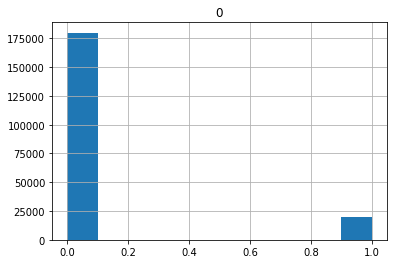

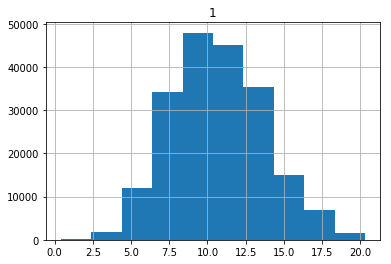

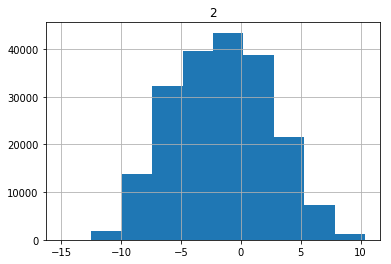

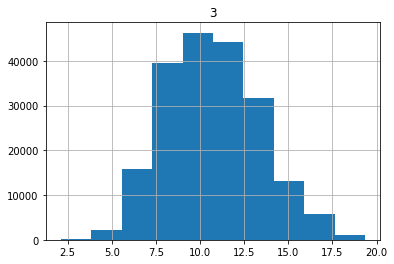

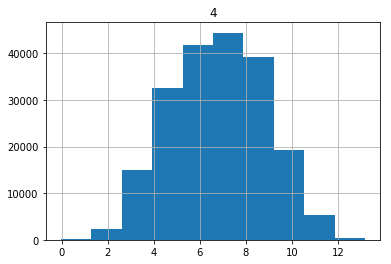

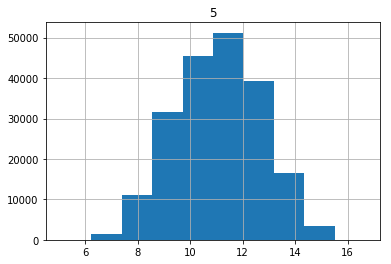

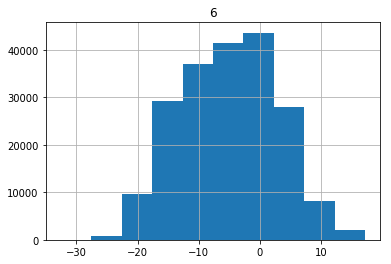

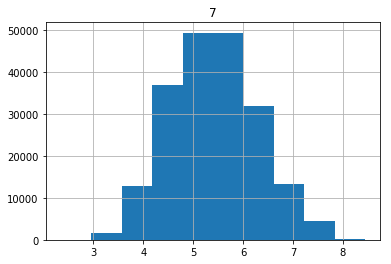

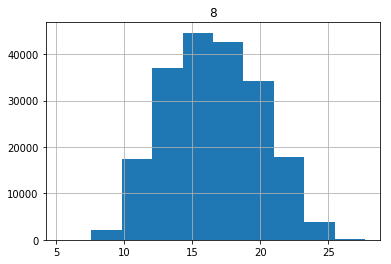

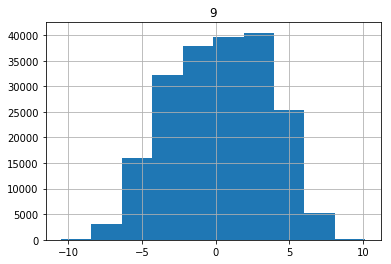

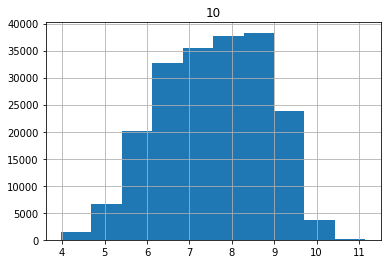

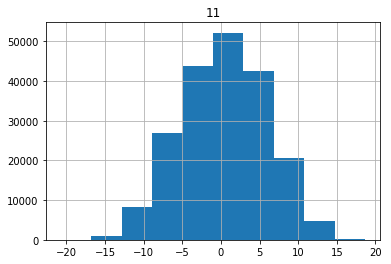

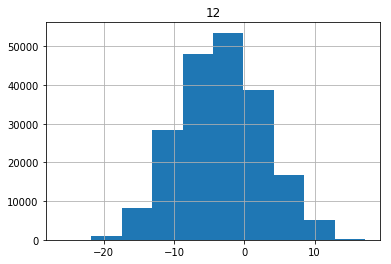

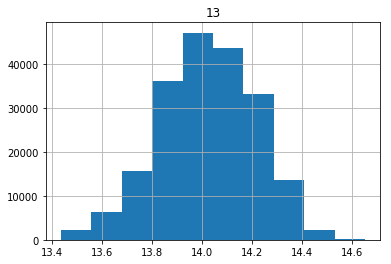

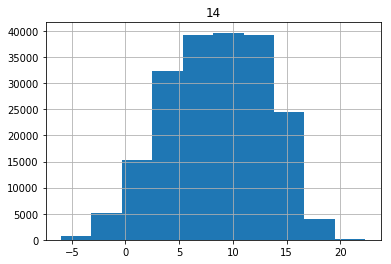

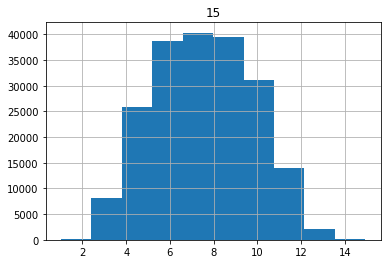

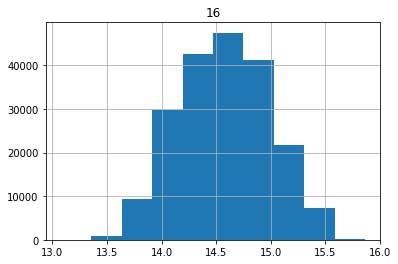

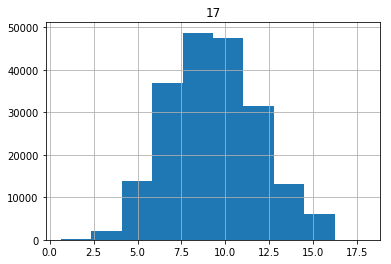

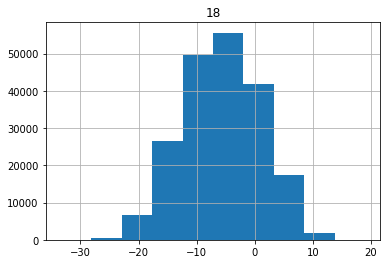

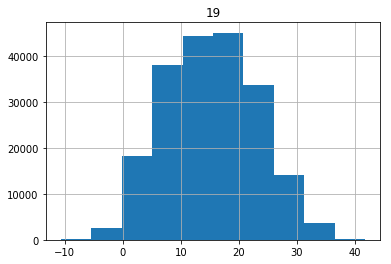

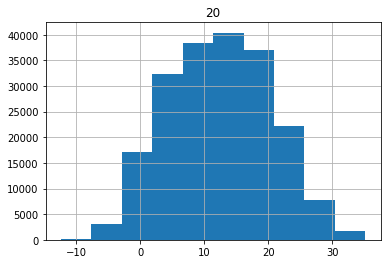

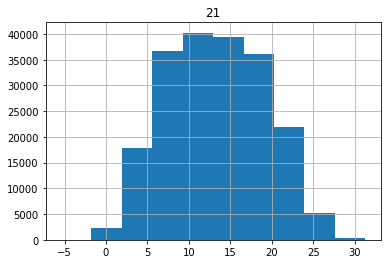

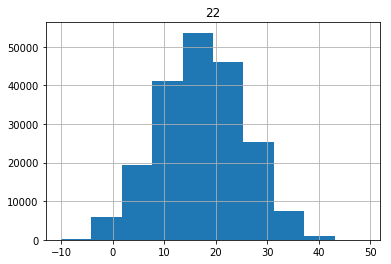

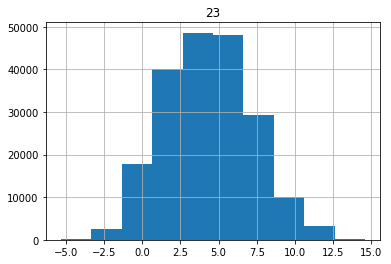

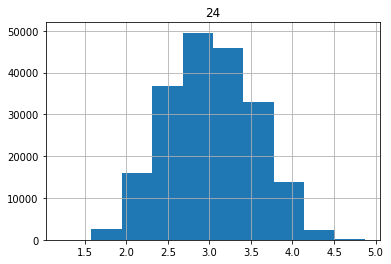

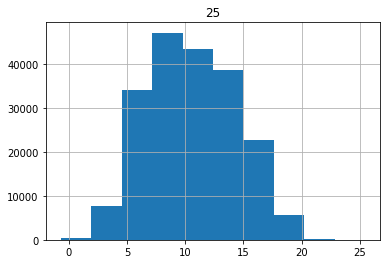

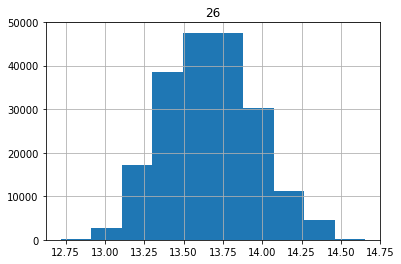

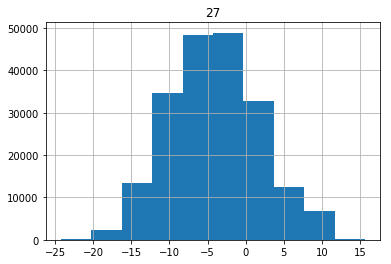

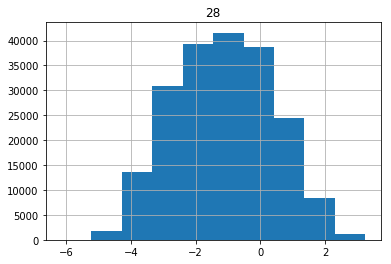

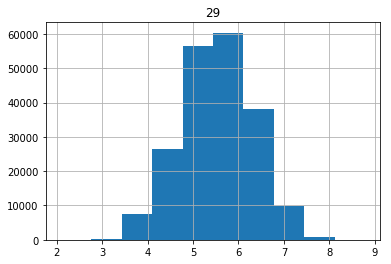

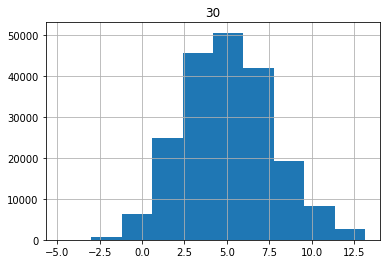

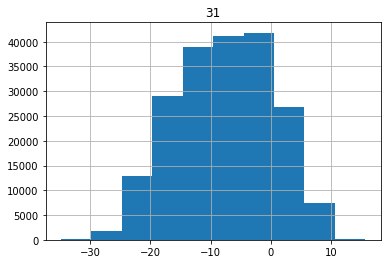

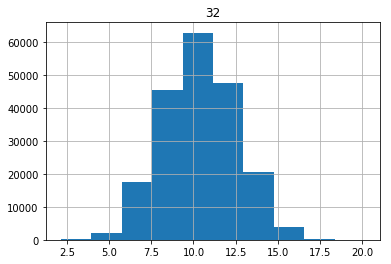

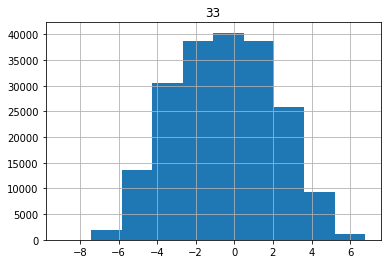

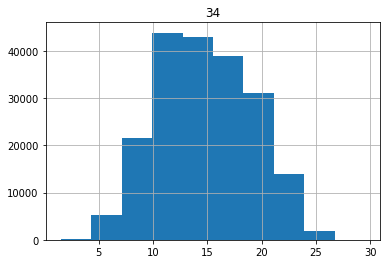

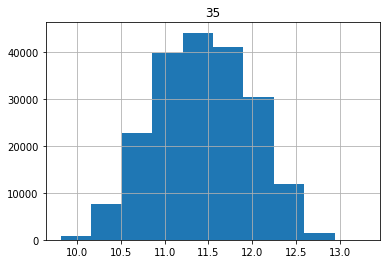

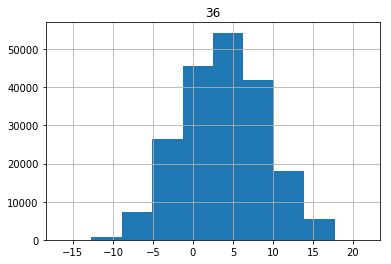

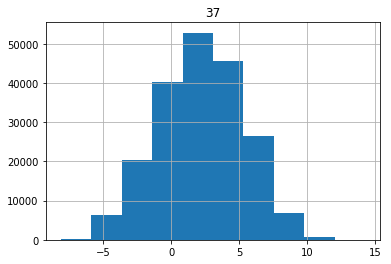

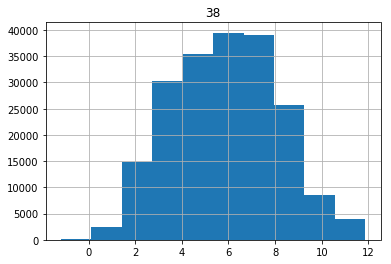

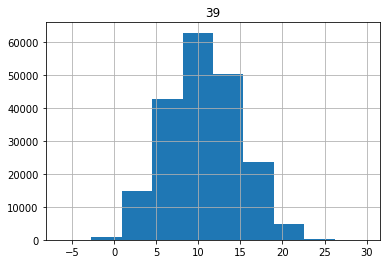

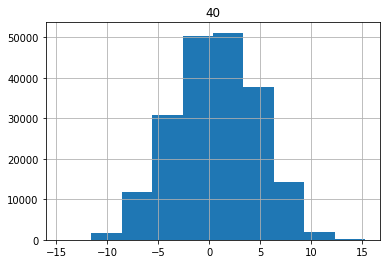

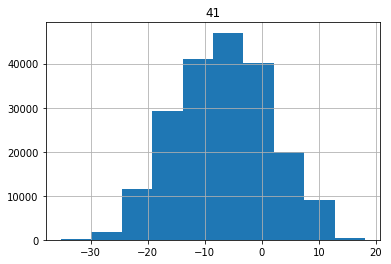

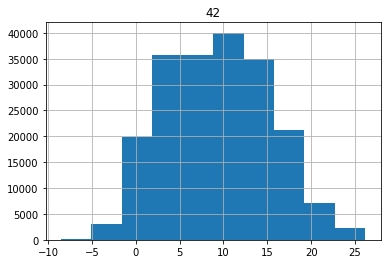

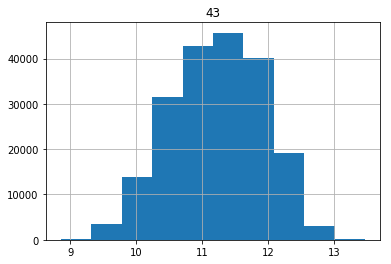

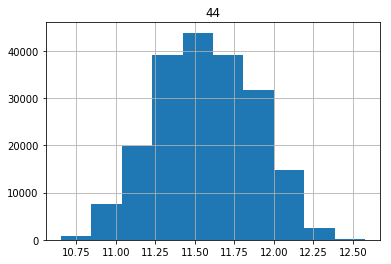

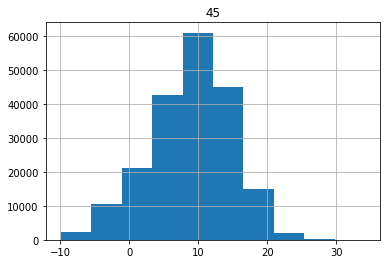

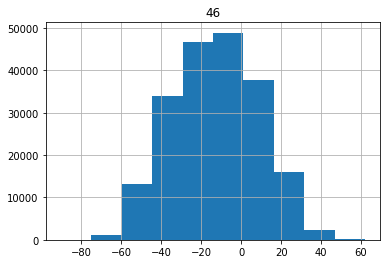

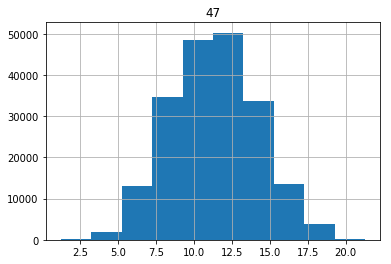

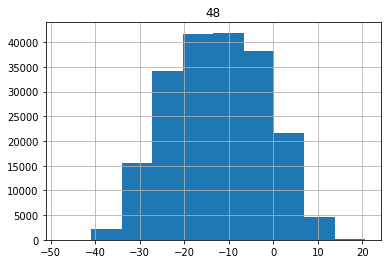

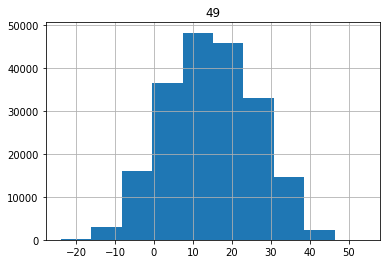

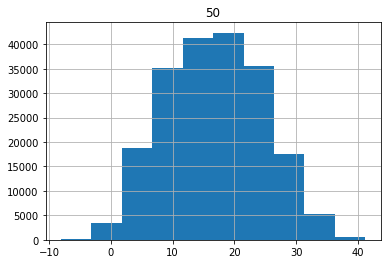

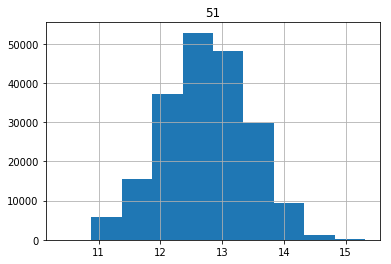

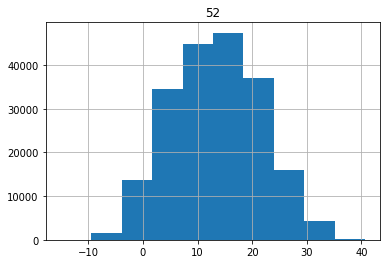

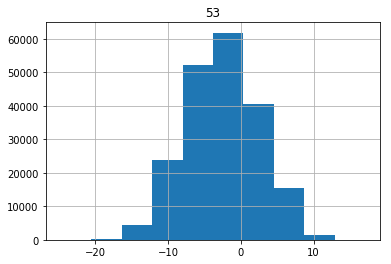

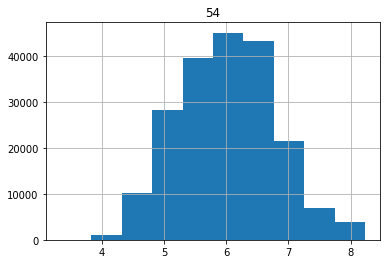

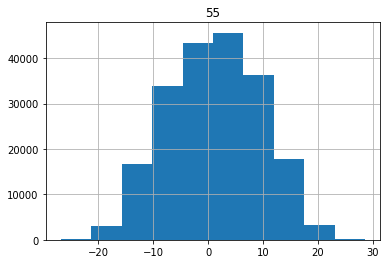

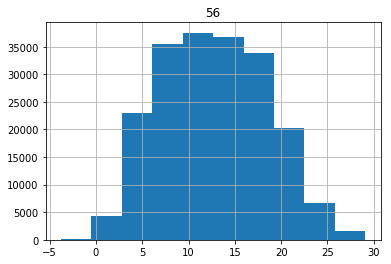

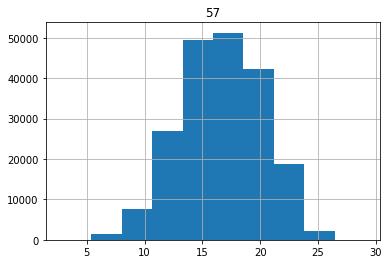

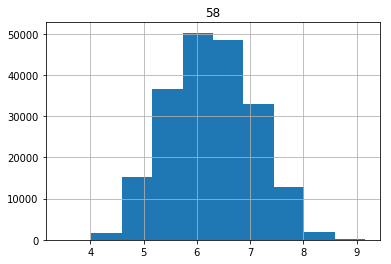

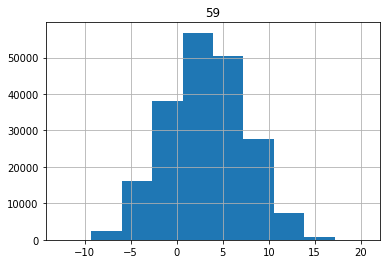

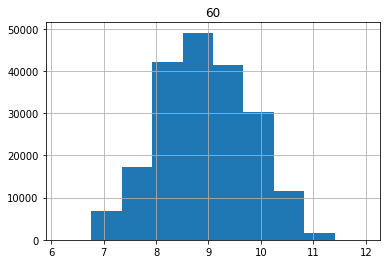

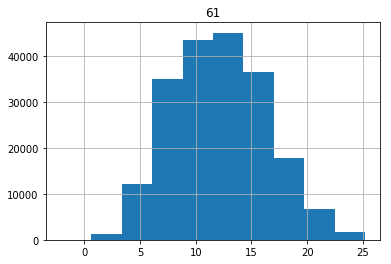

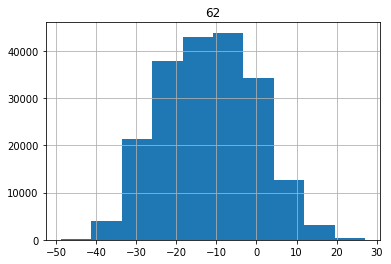

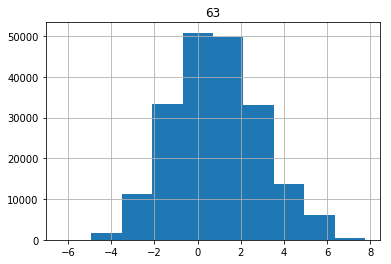

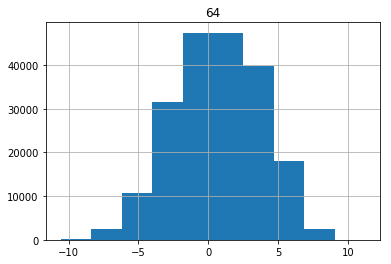

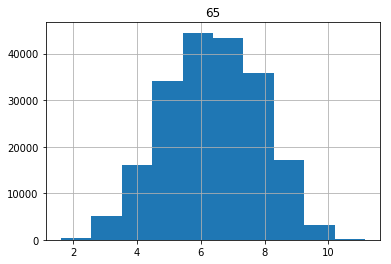

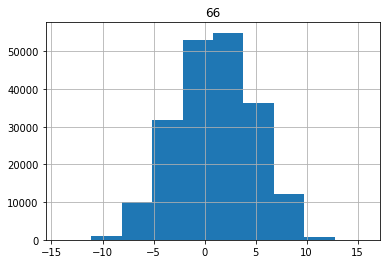

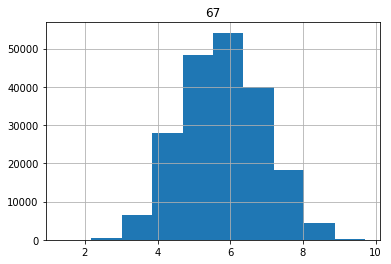

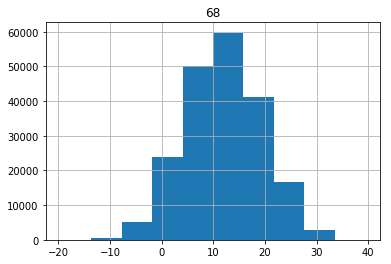

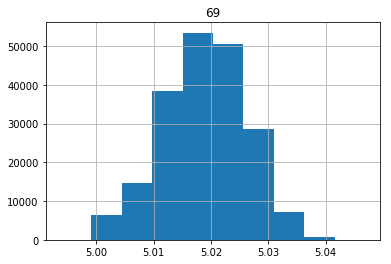

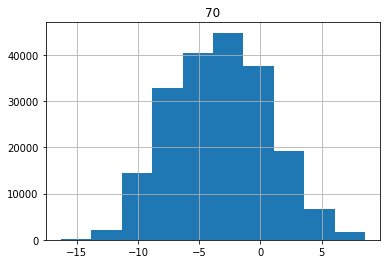

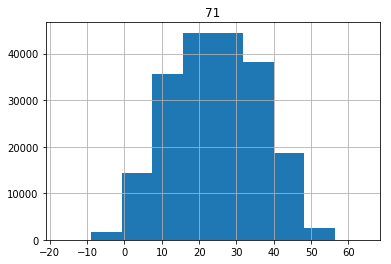

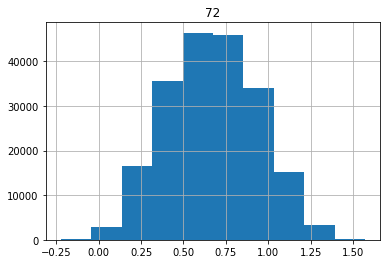

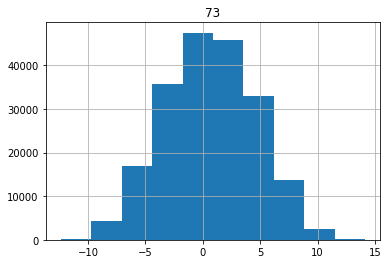

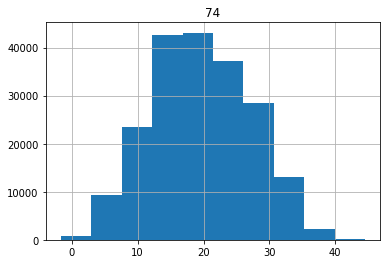

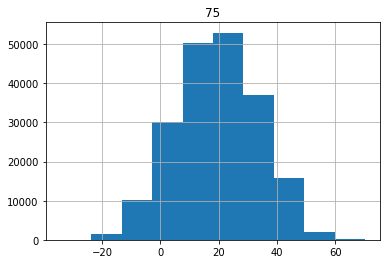

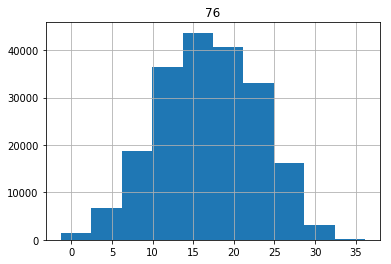

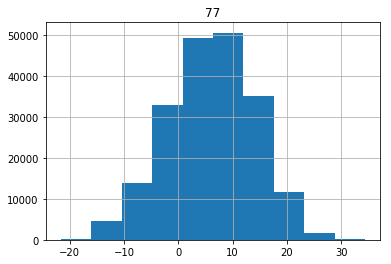

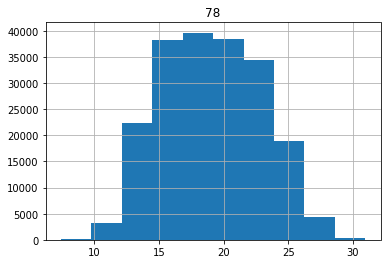

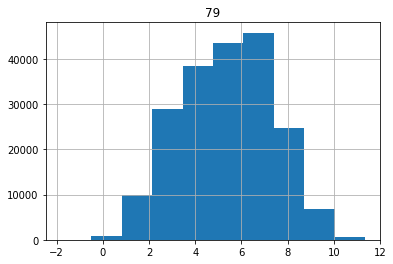

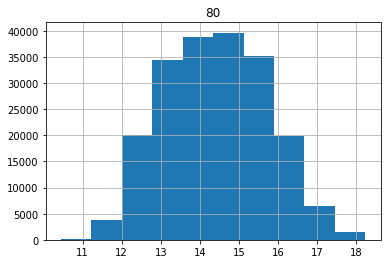

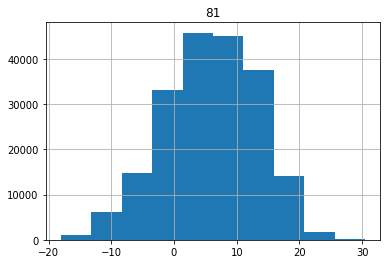

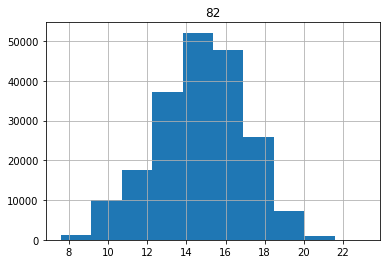

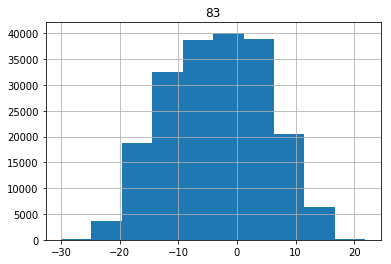

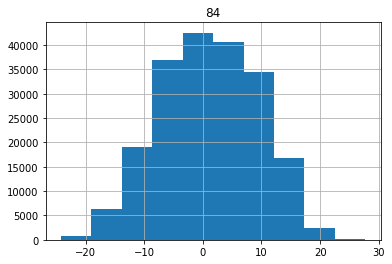

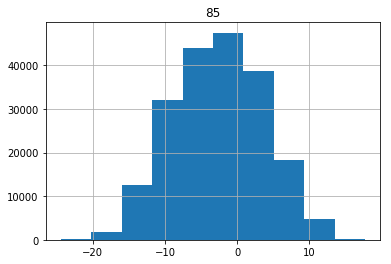

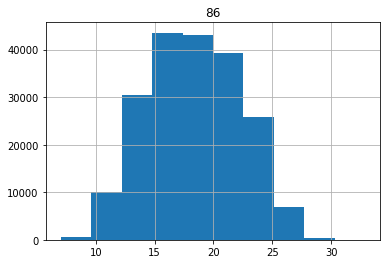

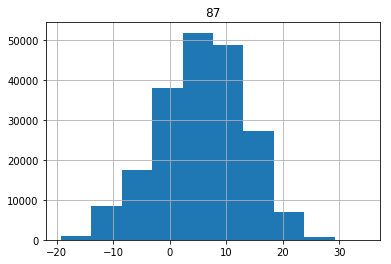

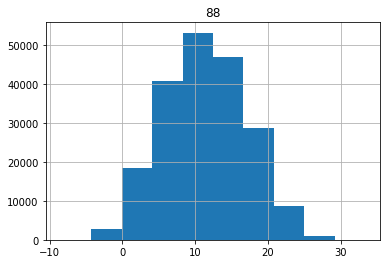

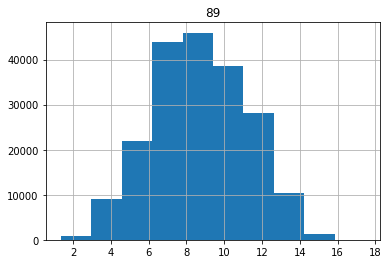

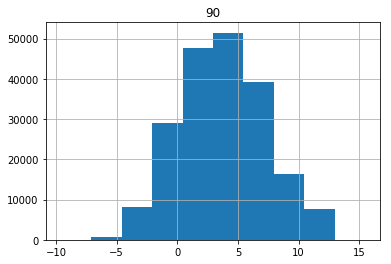

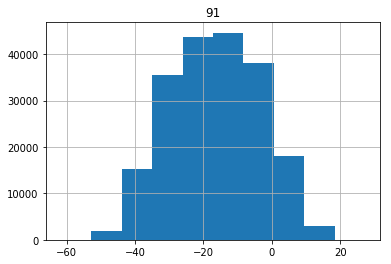

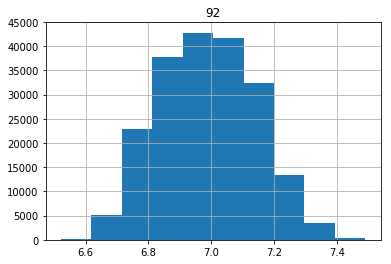

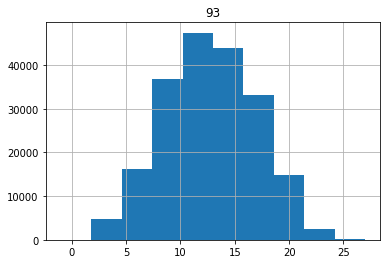

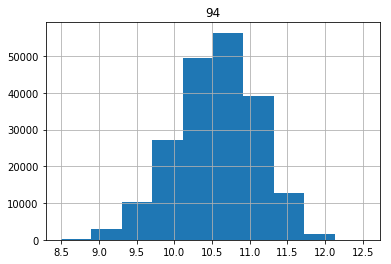

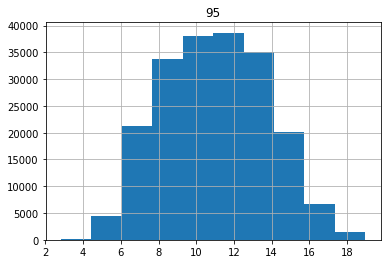

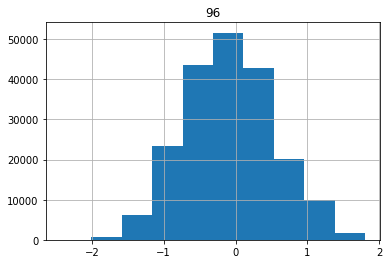

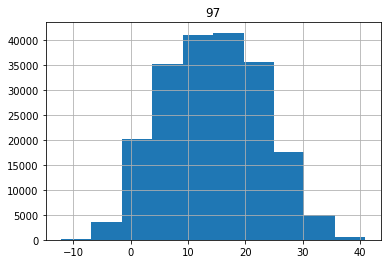

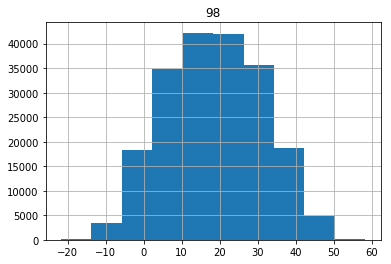

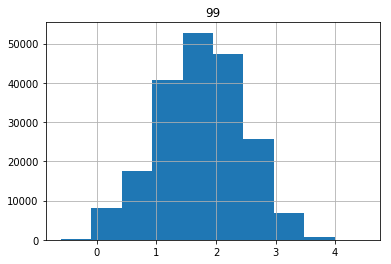

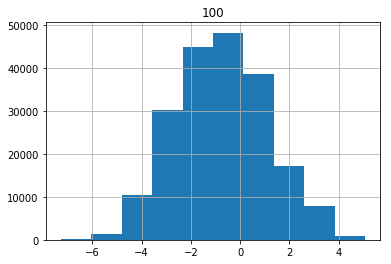

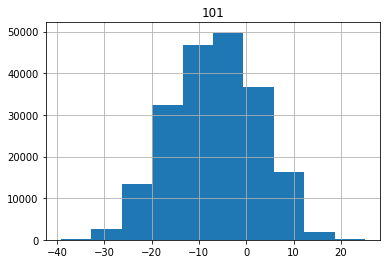

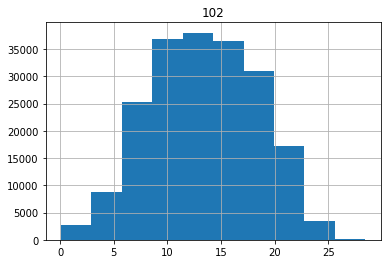

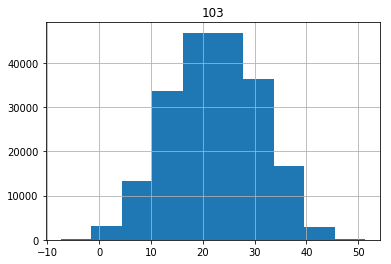

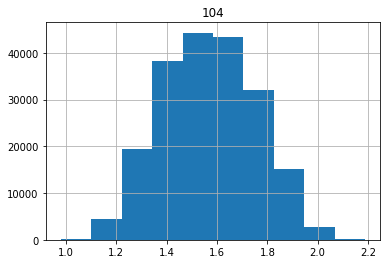

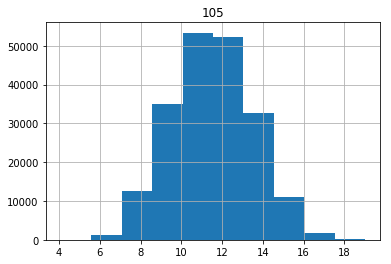

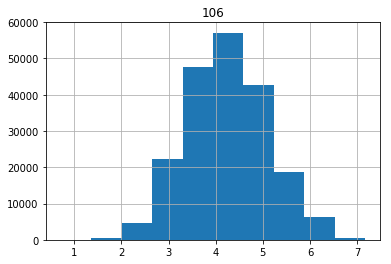

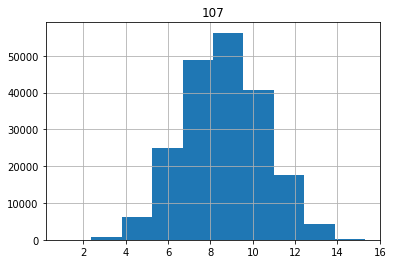

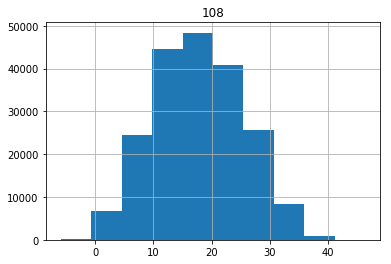

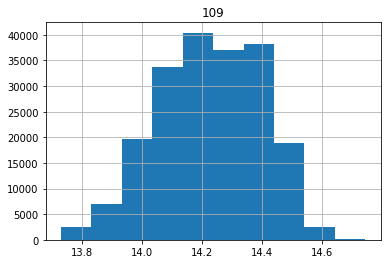

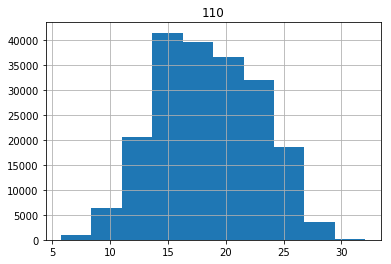

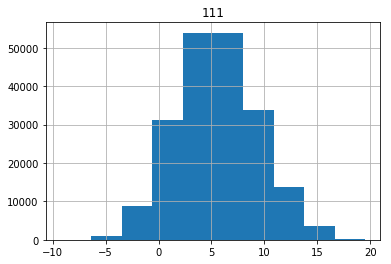

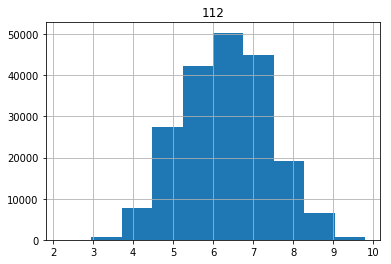

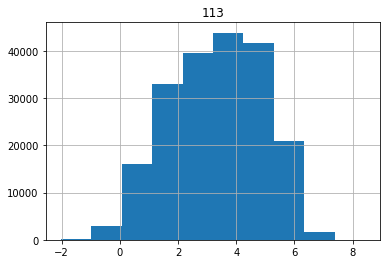

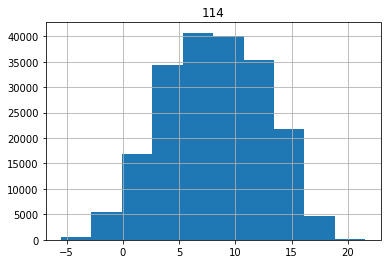

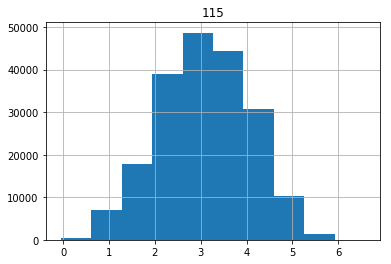

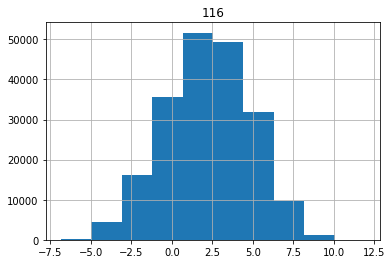

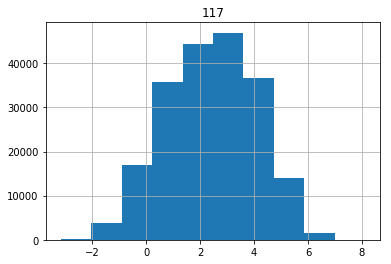

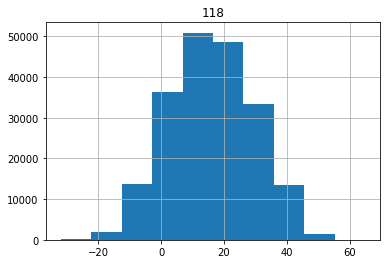

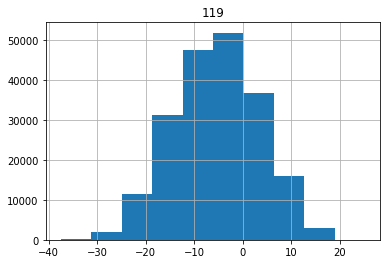

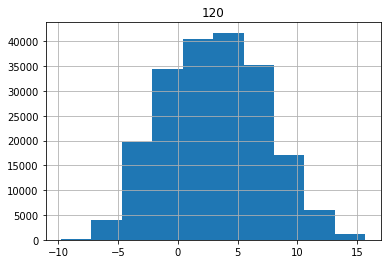

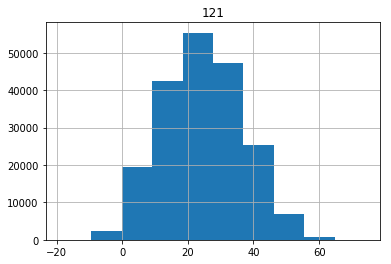

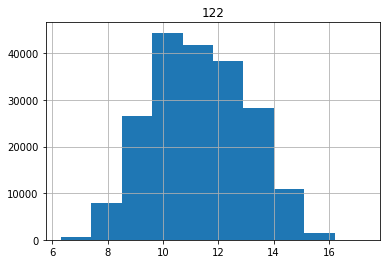

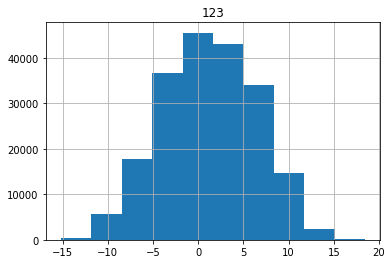

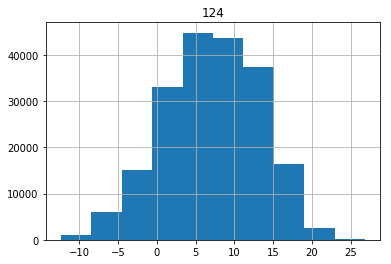

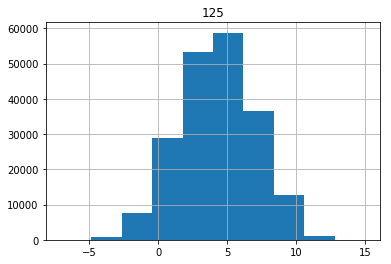

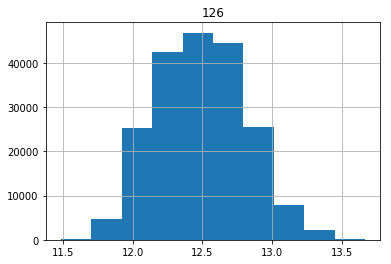

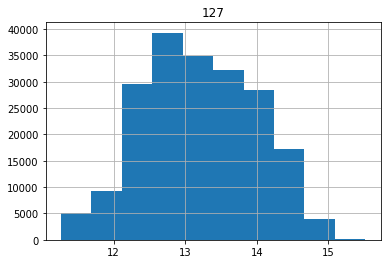

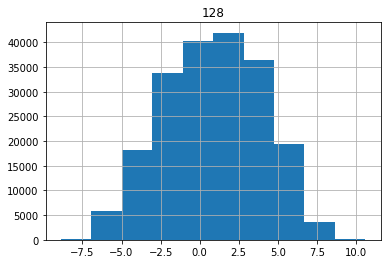

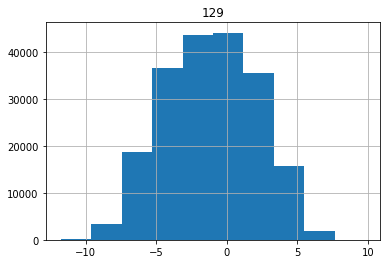

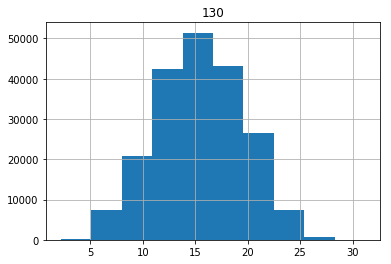

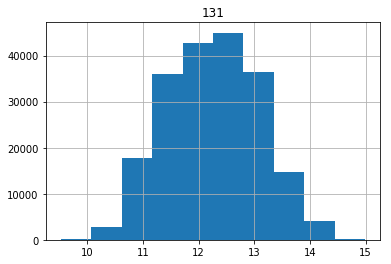

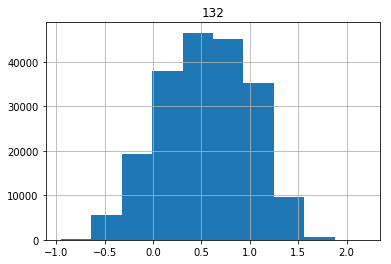

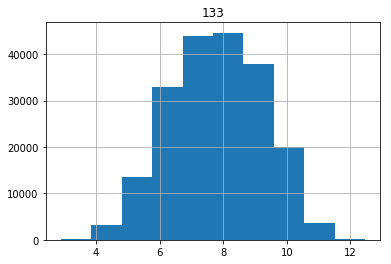

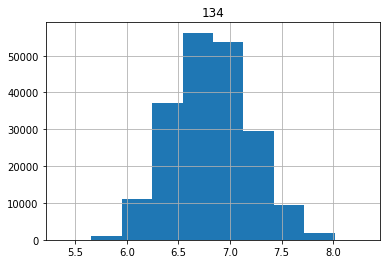

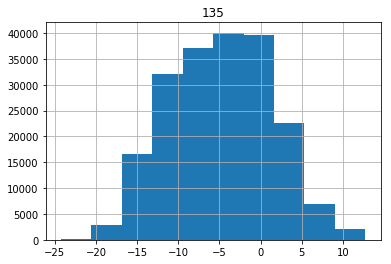

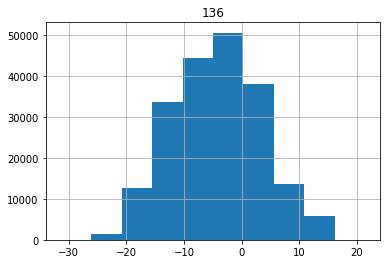

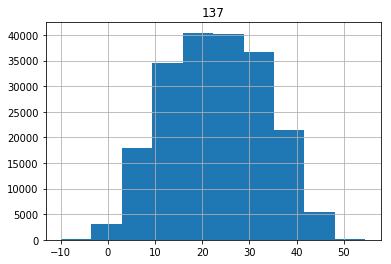

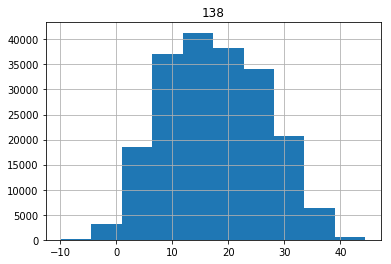

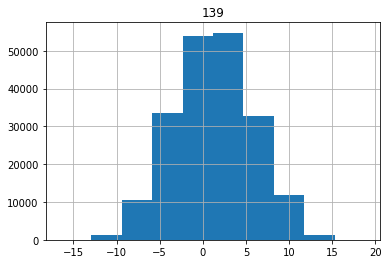

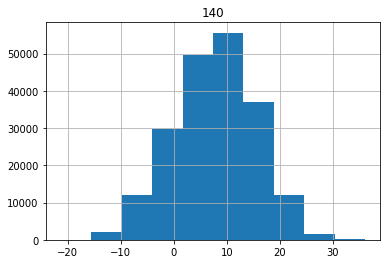

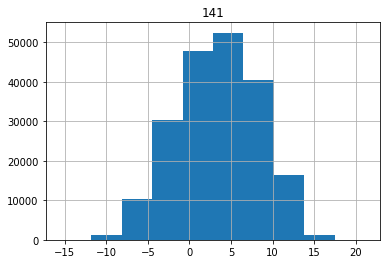

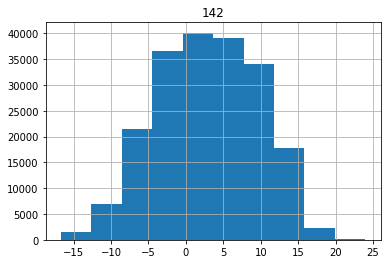

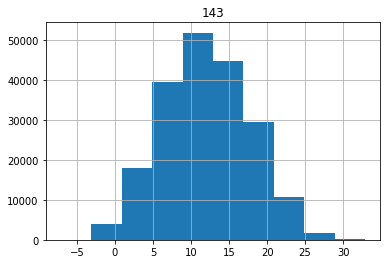

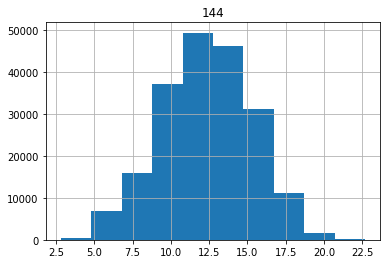

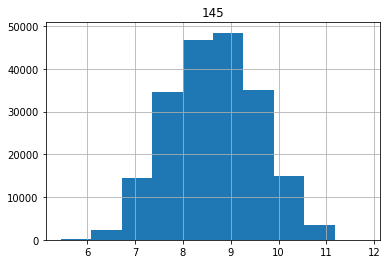

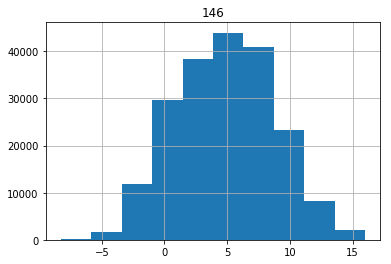

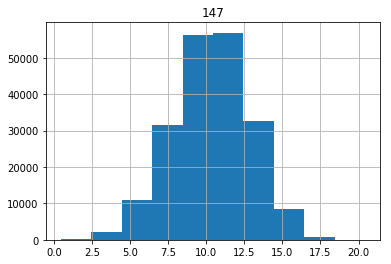

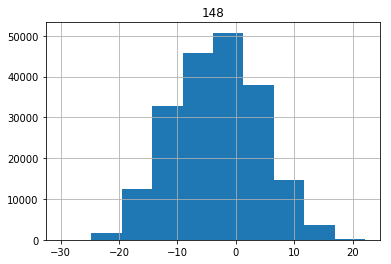

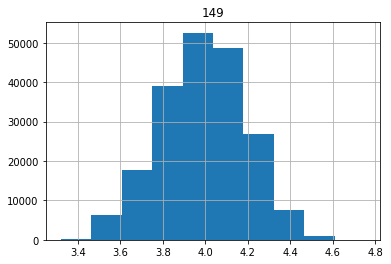

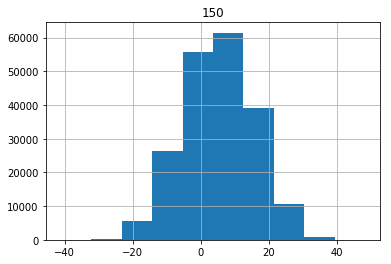

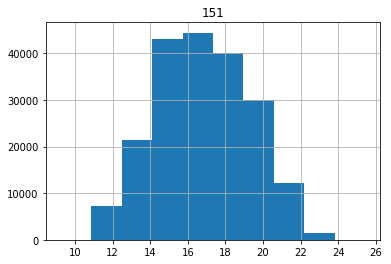

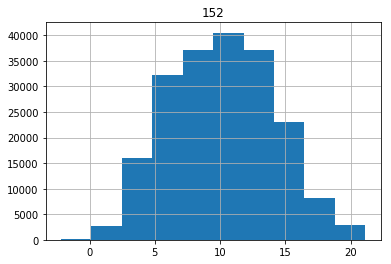

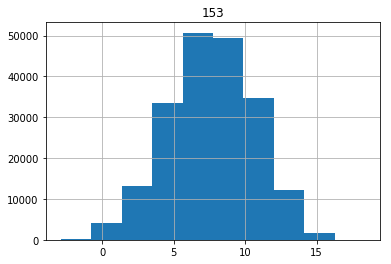

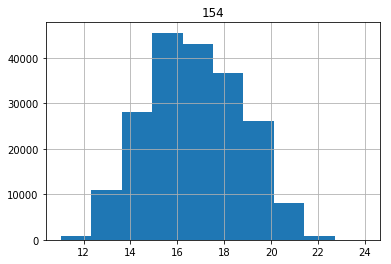

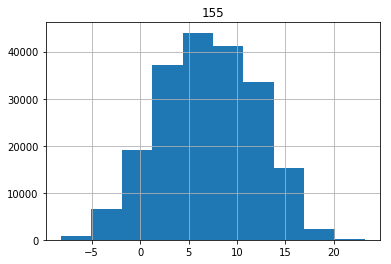

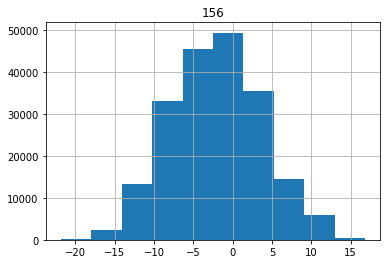

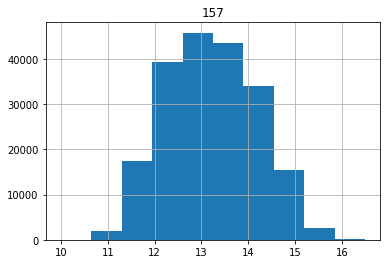

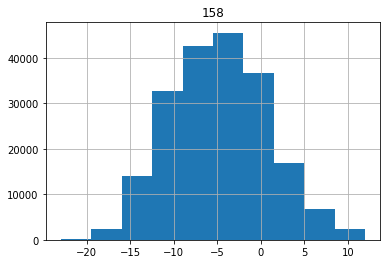

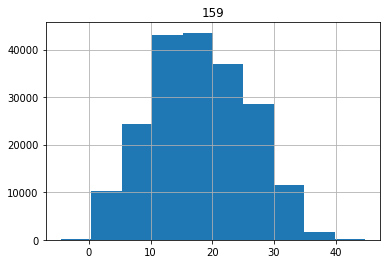

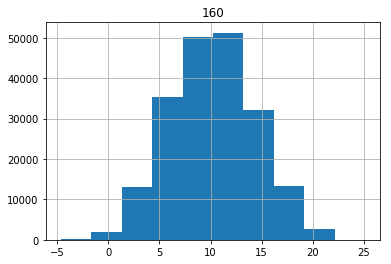

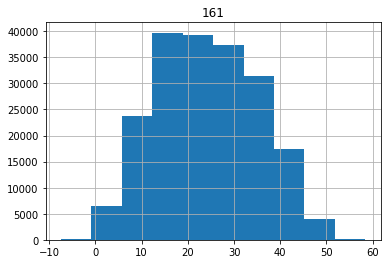

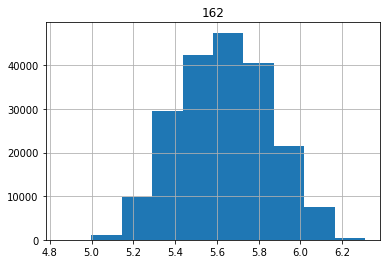

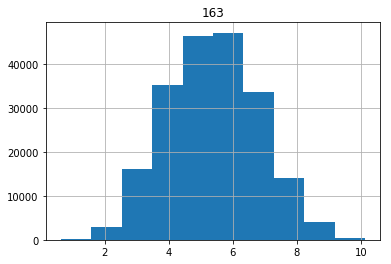

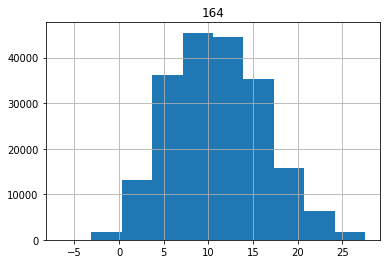

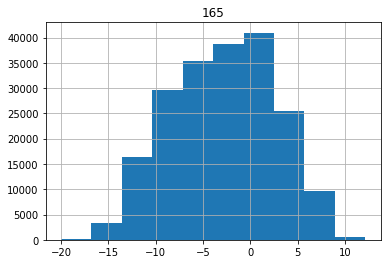

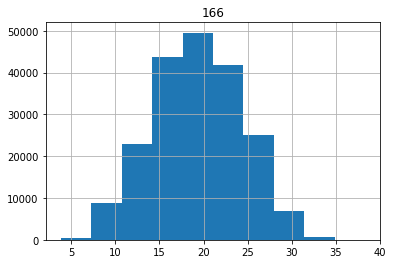

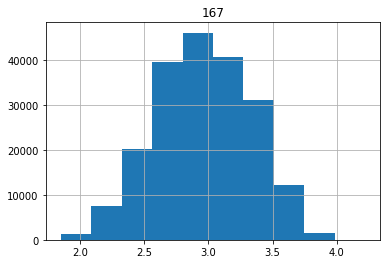

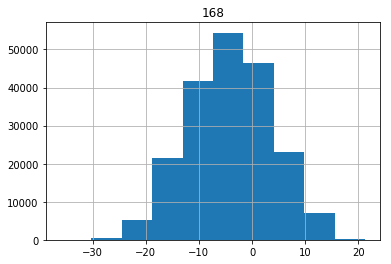

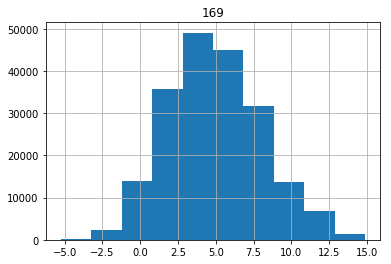

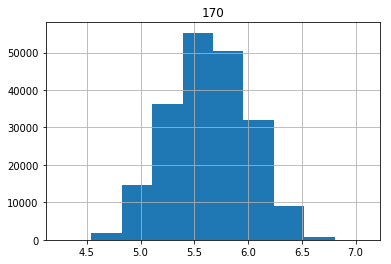

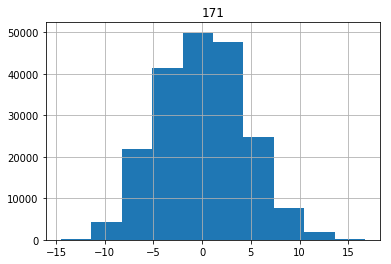

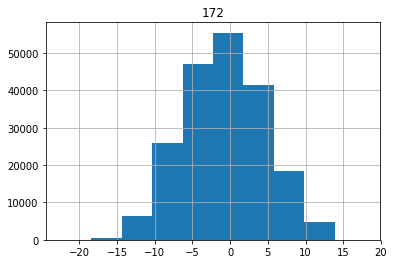

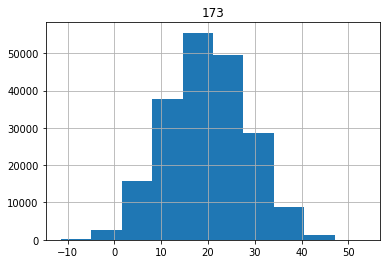

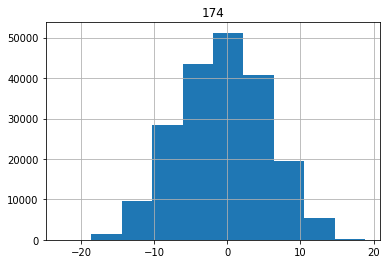

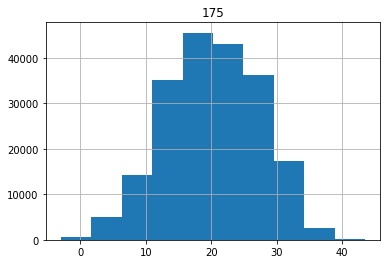

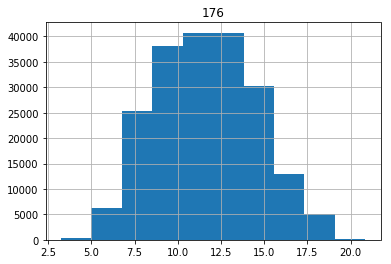

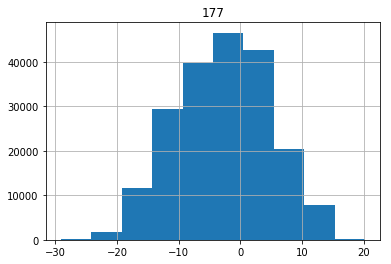

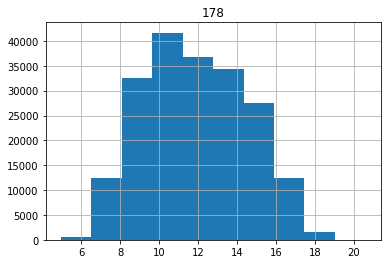

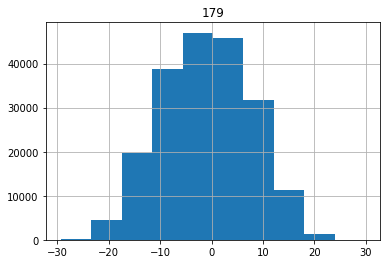

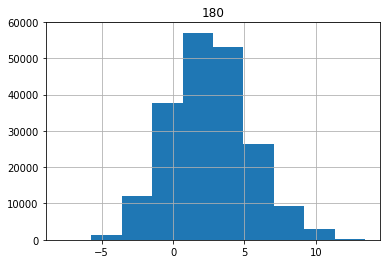

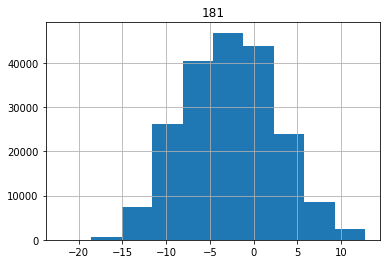

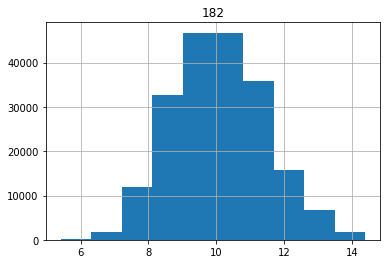

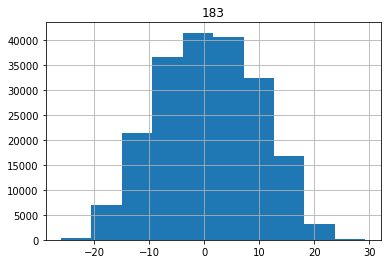

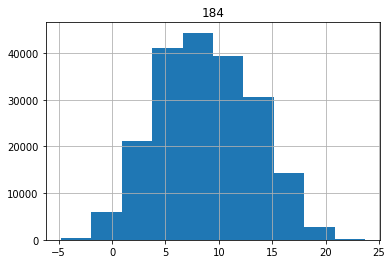

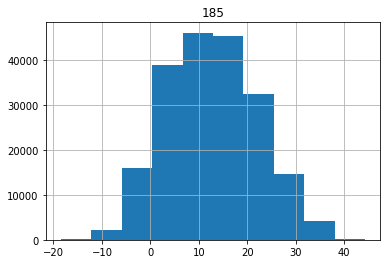

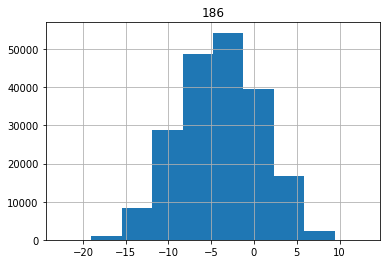

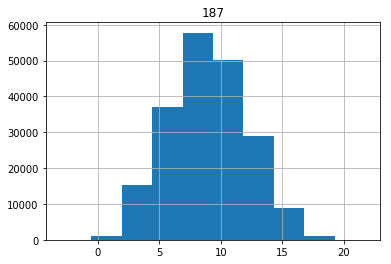

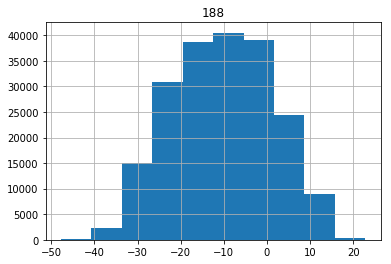

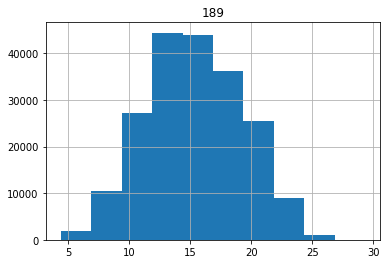

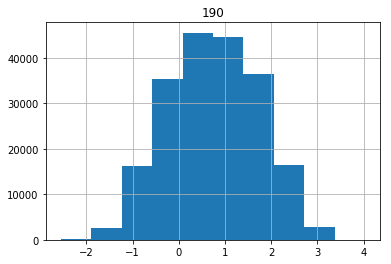

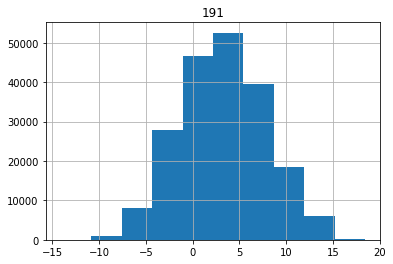

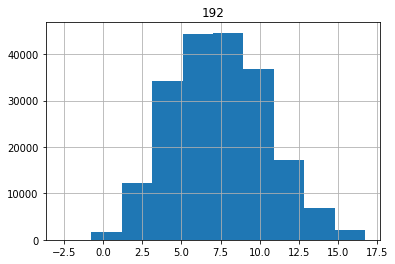

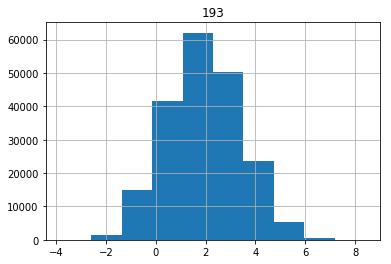

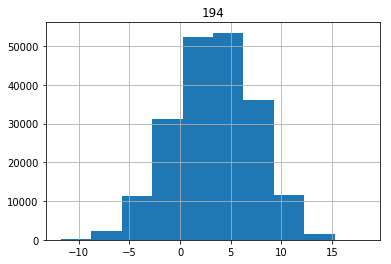

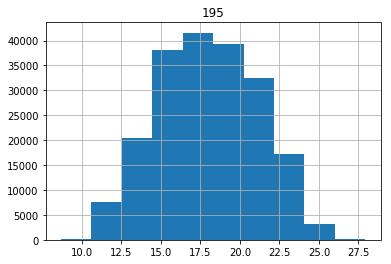

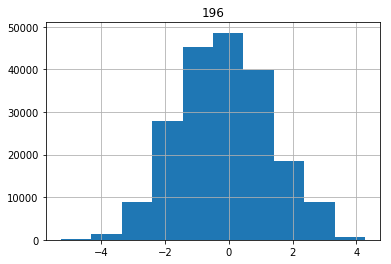

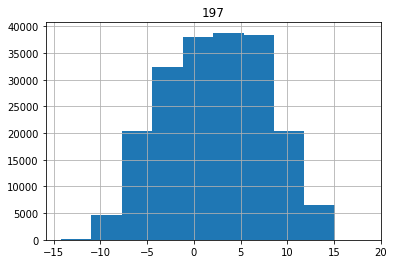

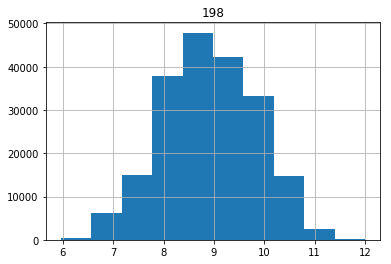

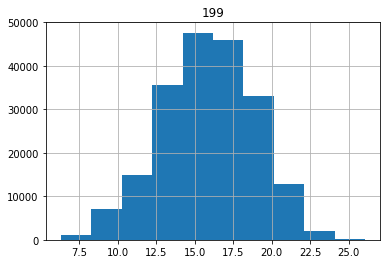

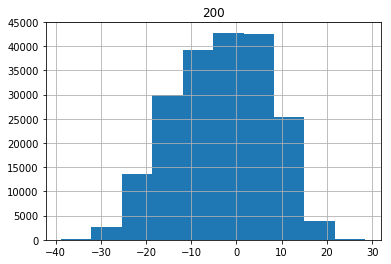

In [12]:
#Feature Distributions

#Historgram

for column in range(0,len(training_data_df.columns)):
    training_data_df.iloc[:,column].hist()
    pyplot.title(column)
    pyplot.show()

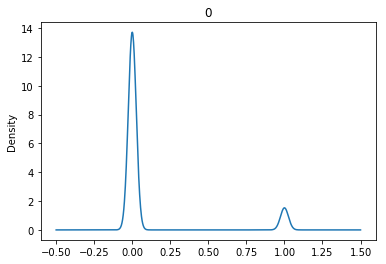

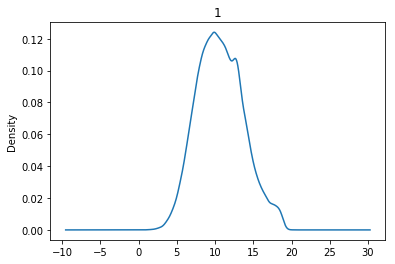

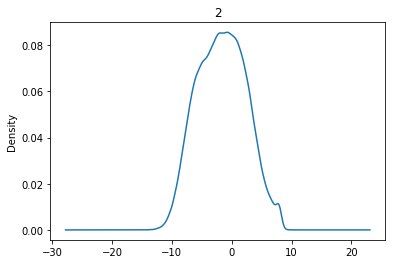

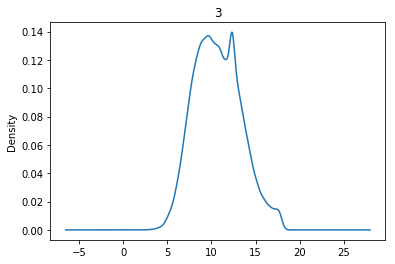

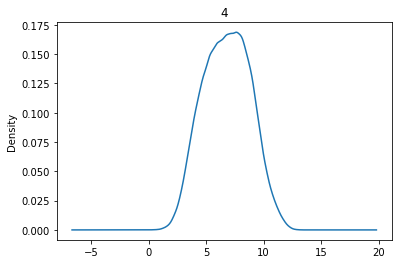

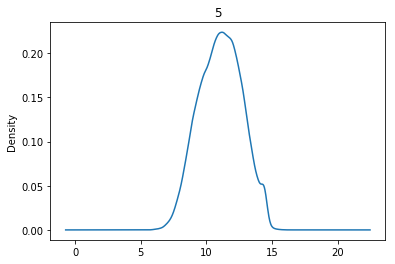

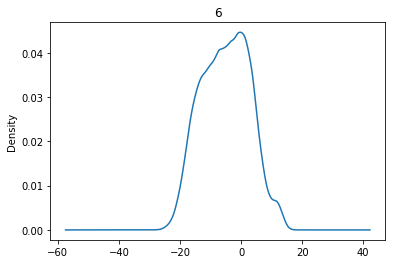

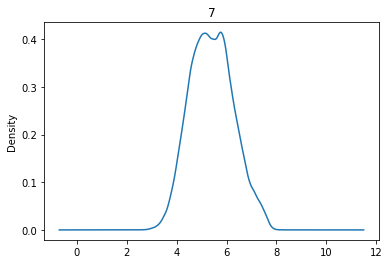

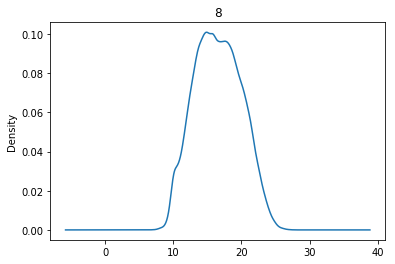

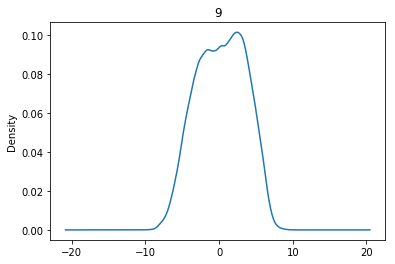

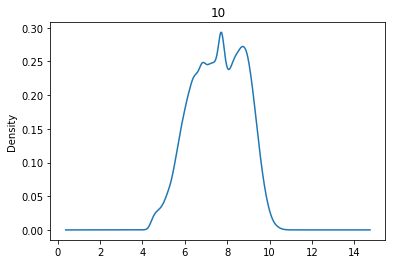

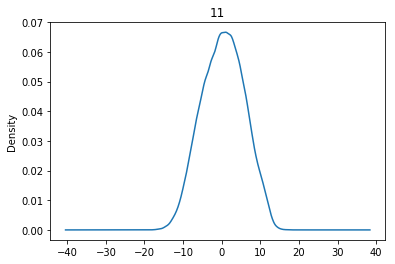

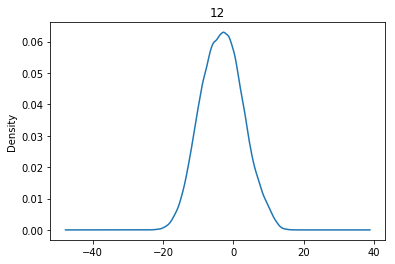

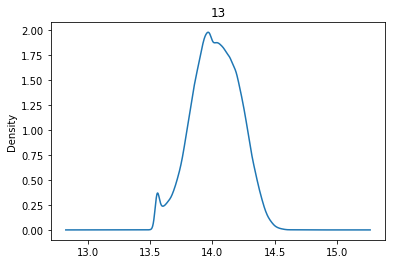

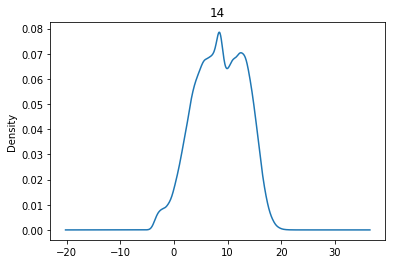

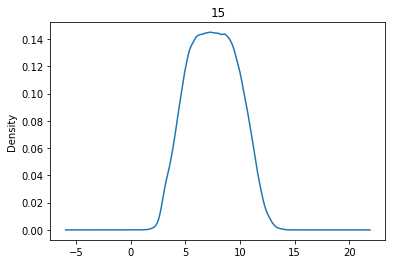

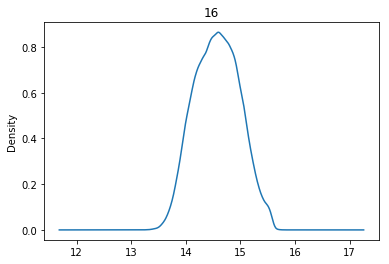

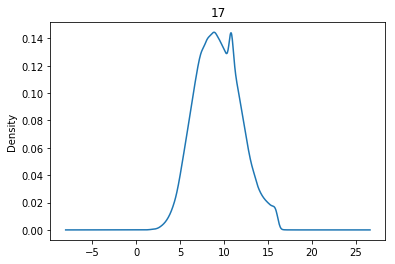

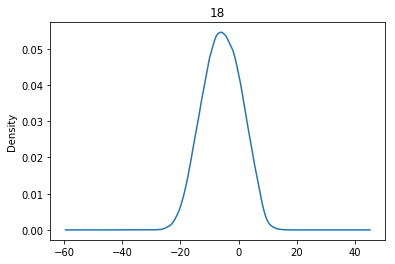

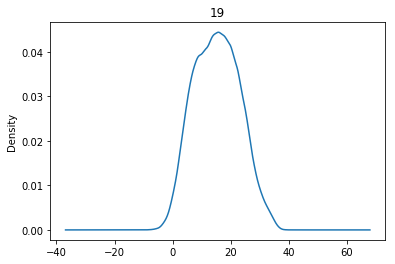

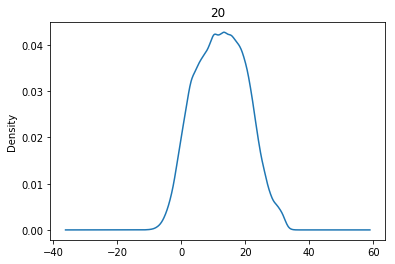

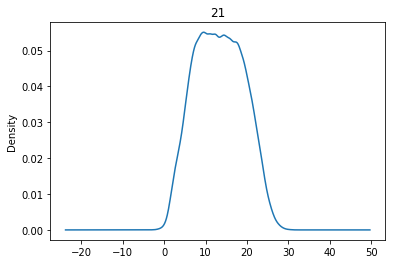

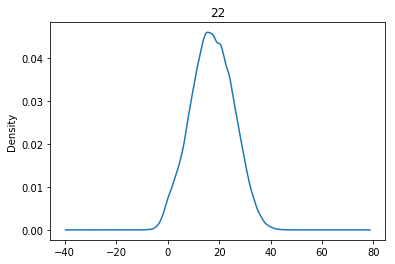

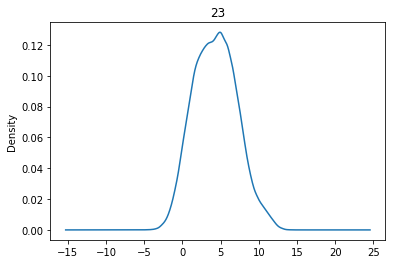

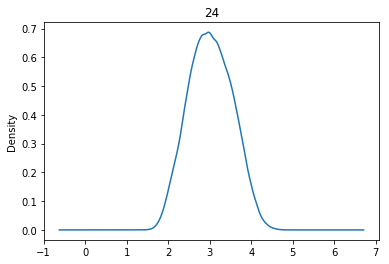

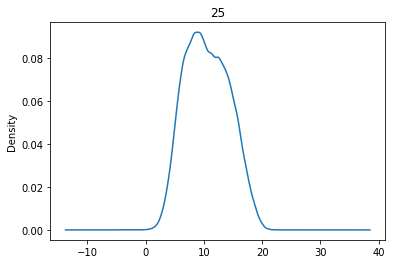

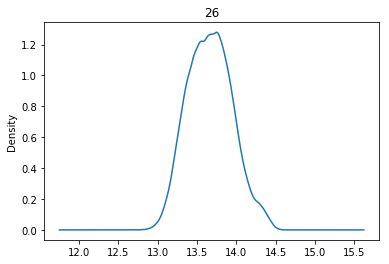

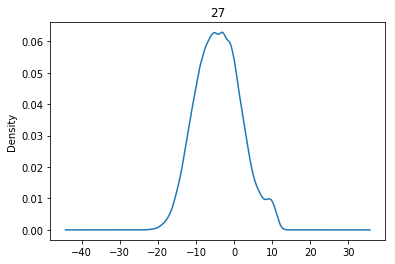

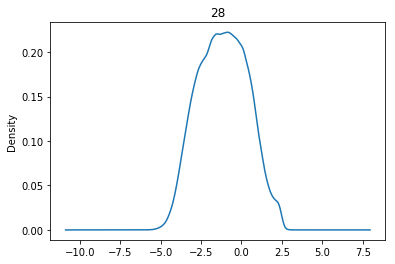

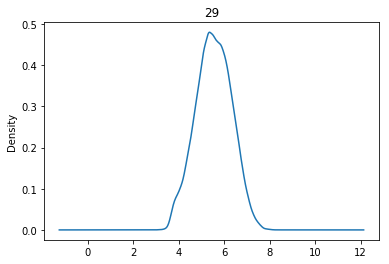

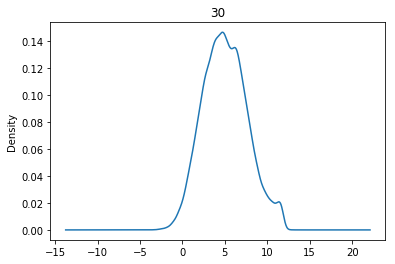

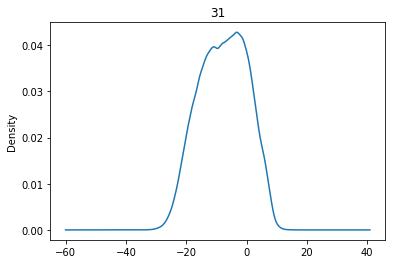

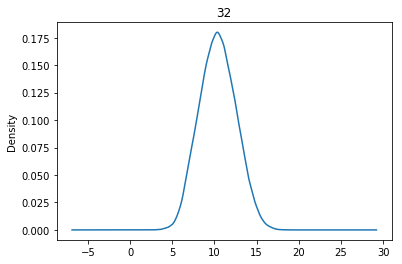

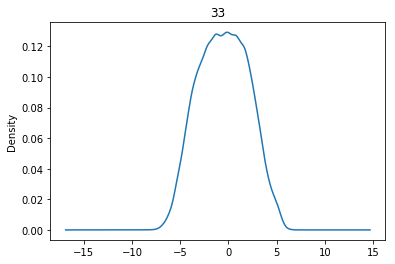

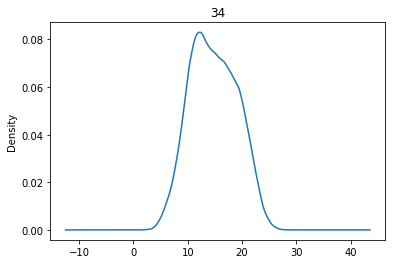

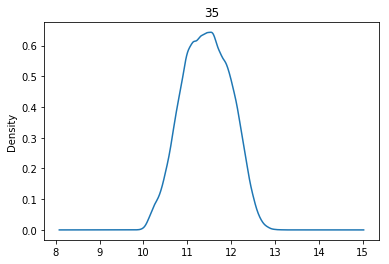

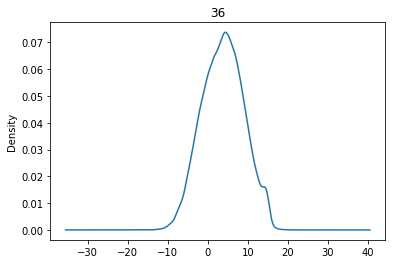

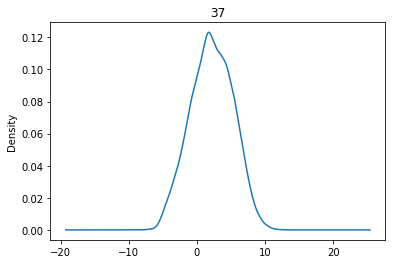

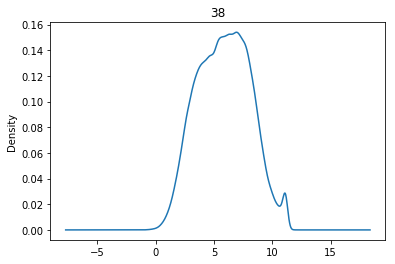

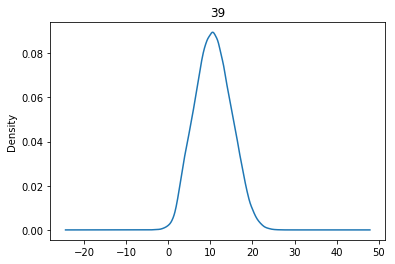

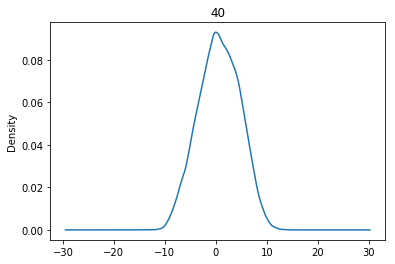

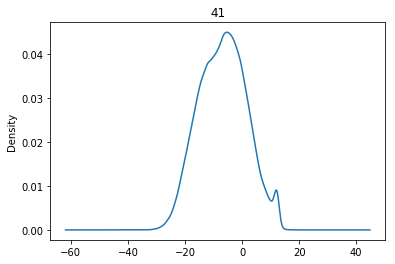

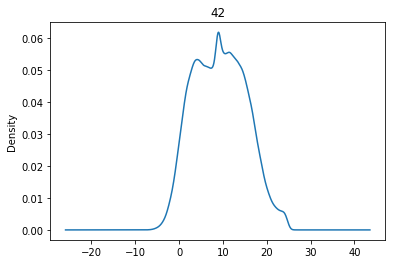

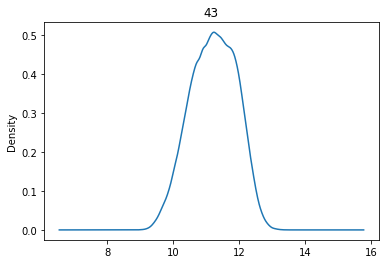

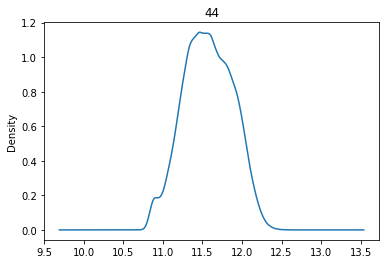

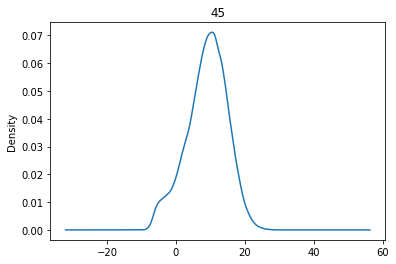

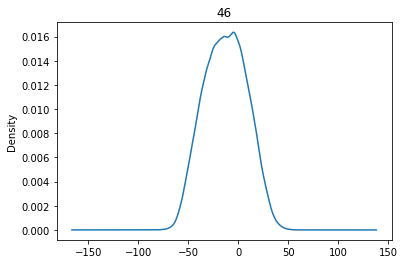

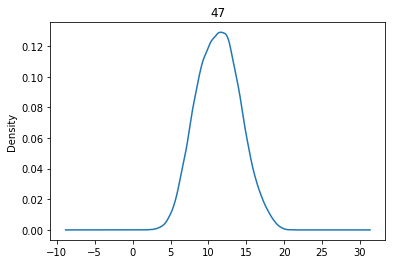

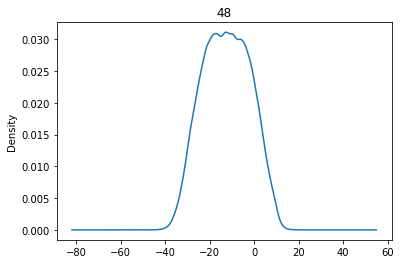

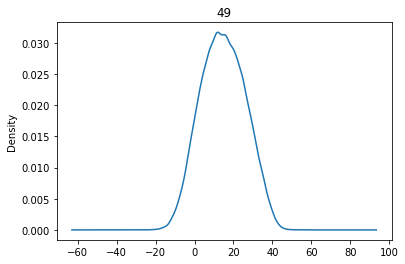

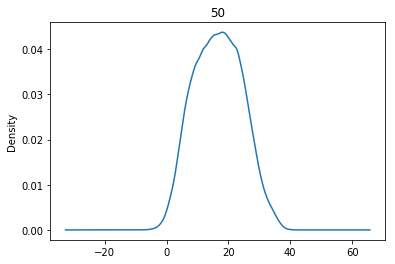

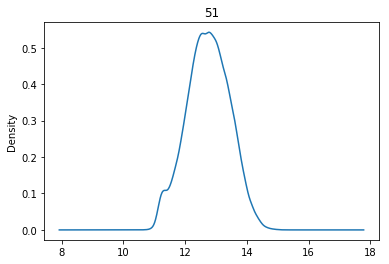

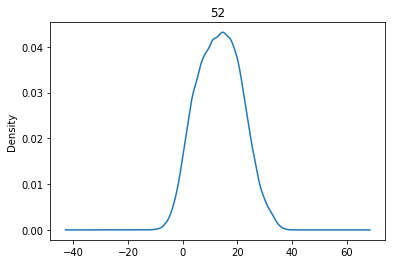

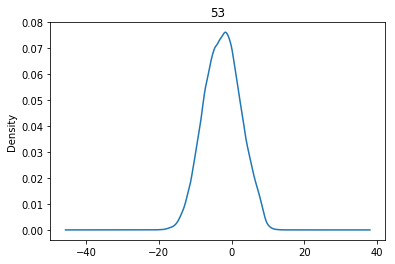

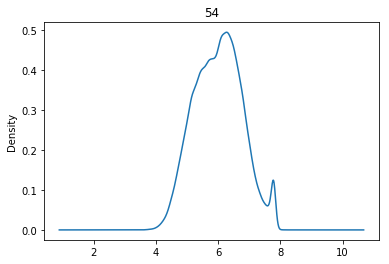

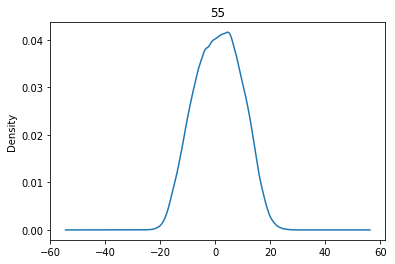

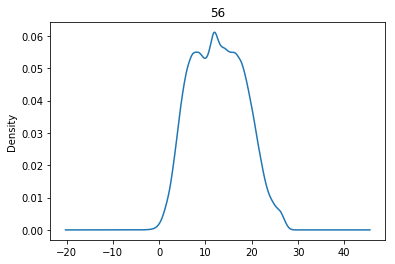

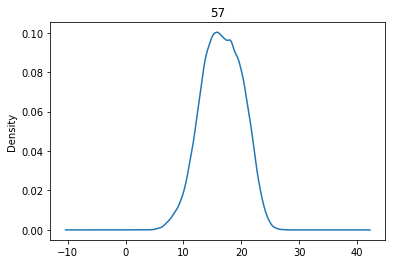

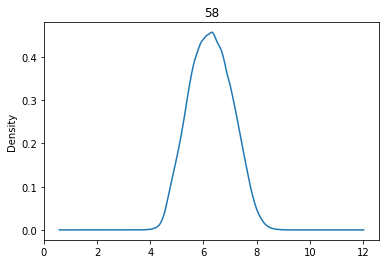

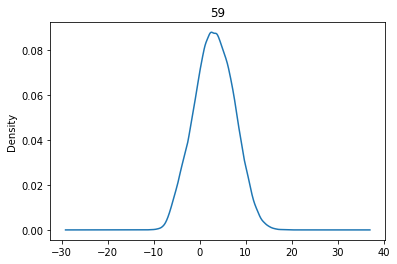

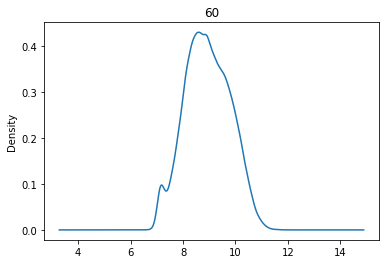

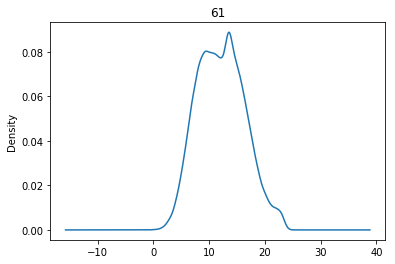

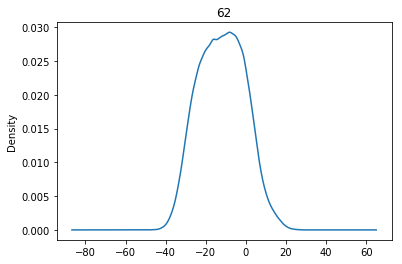

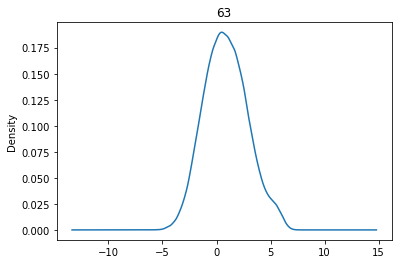

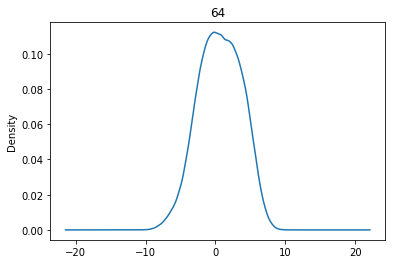

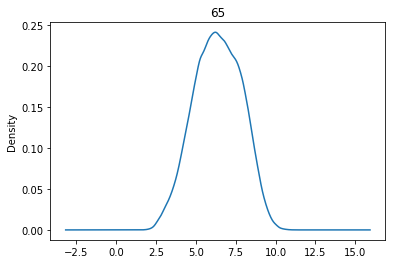

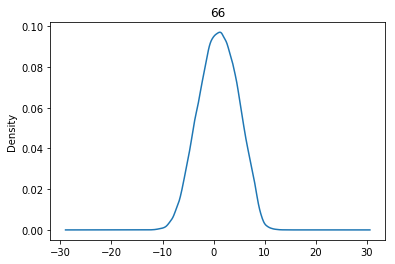

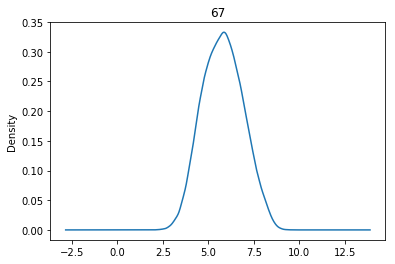

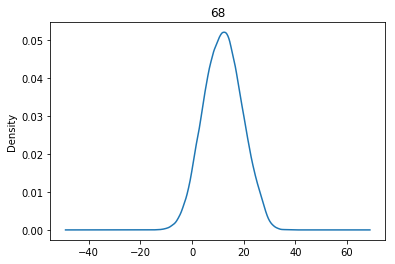

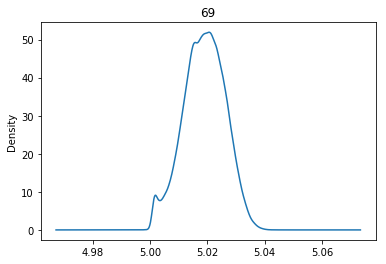

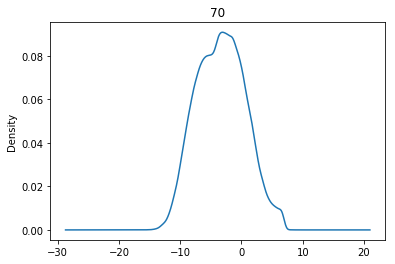

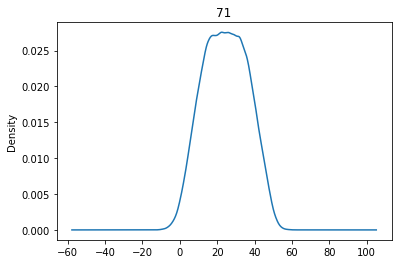

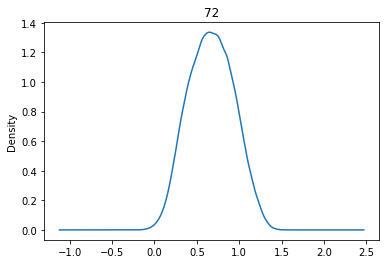

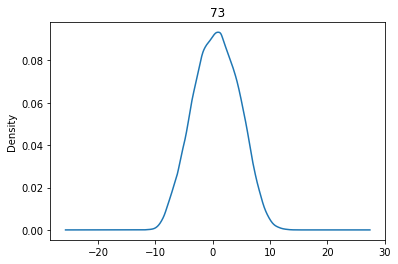

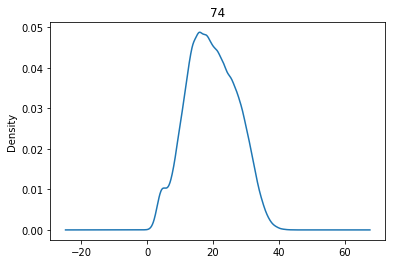

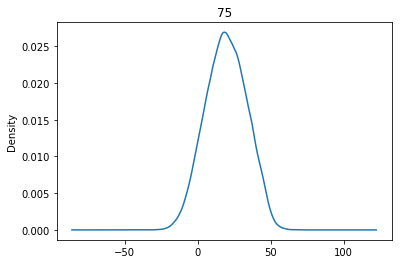

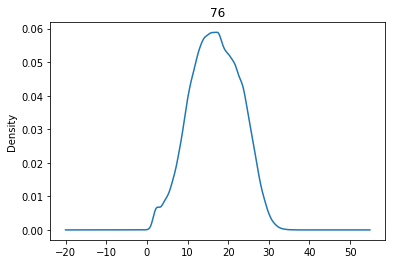

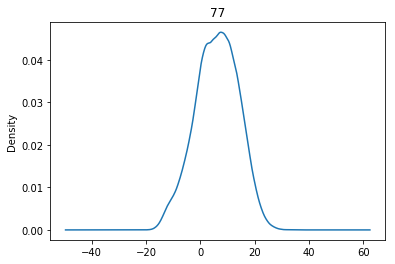

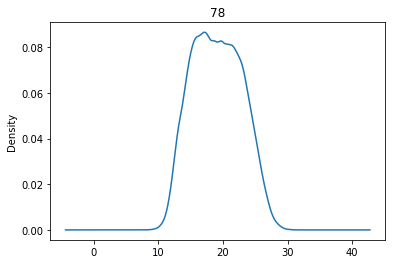

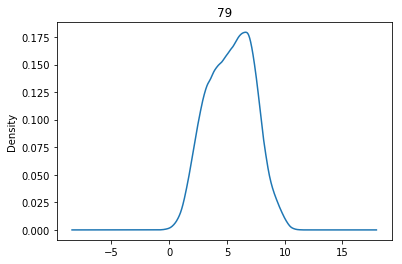

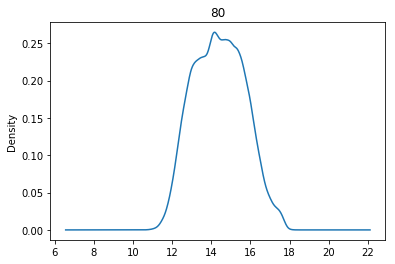

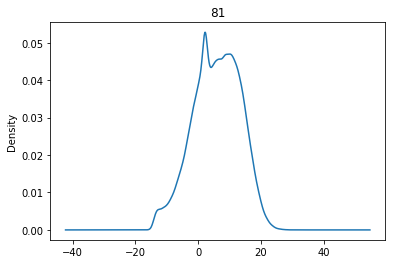

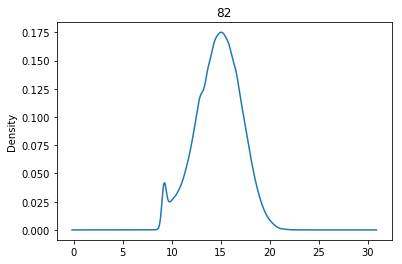

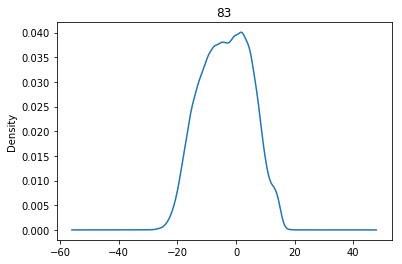

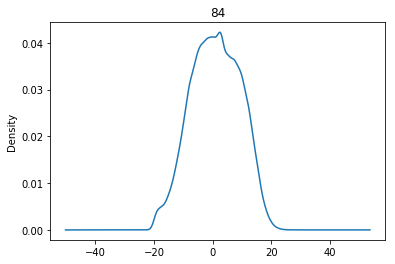

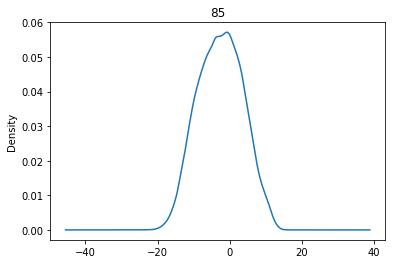

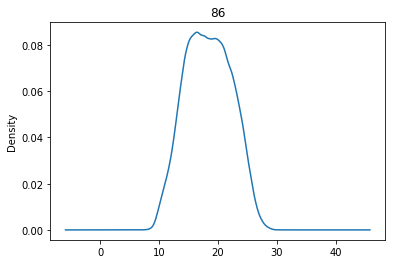

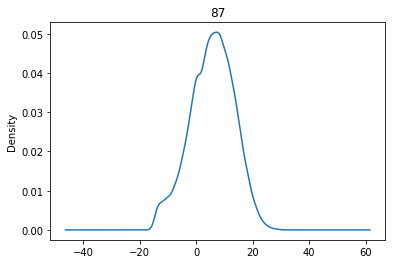

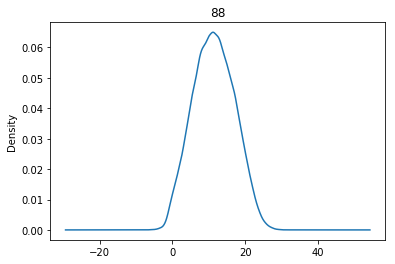

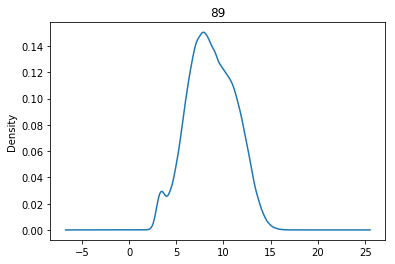

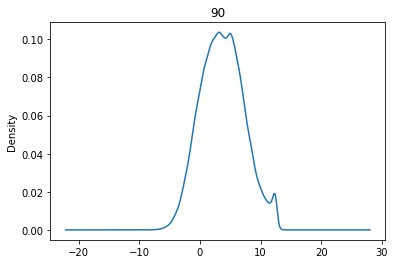

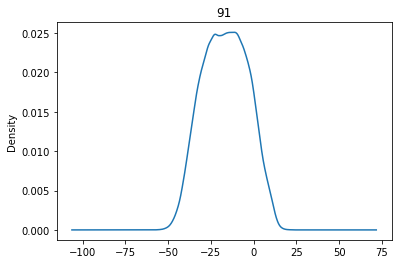

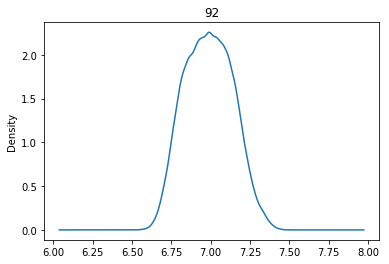

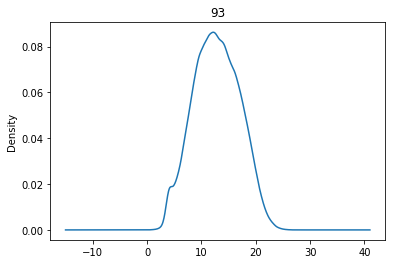

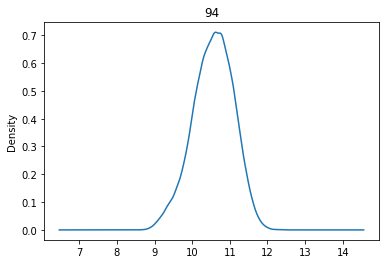

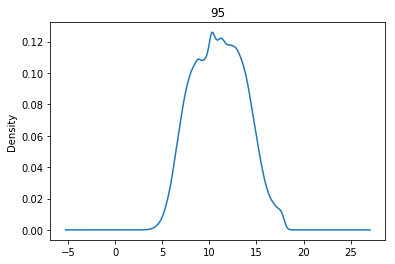

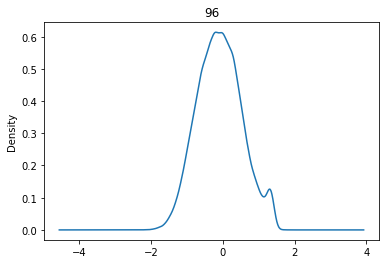

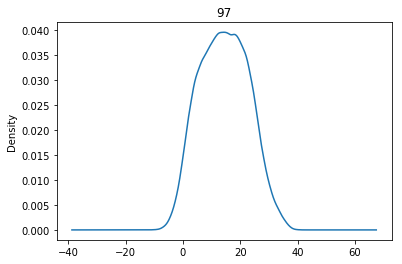

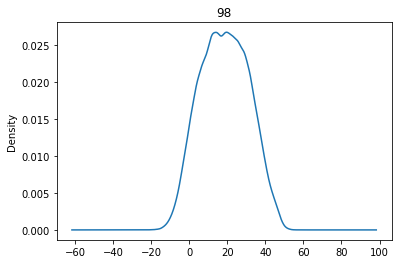

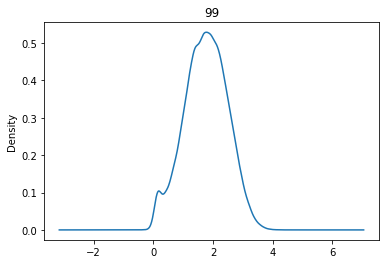

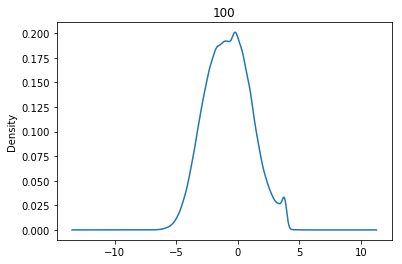

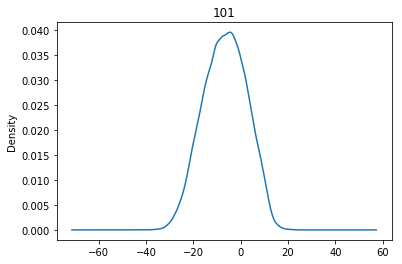

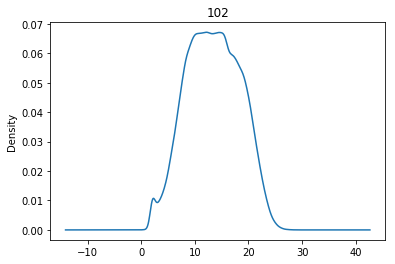

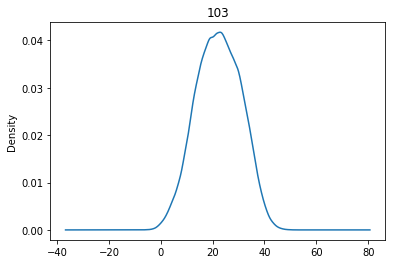

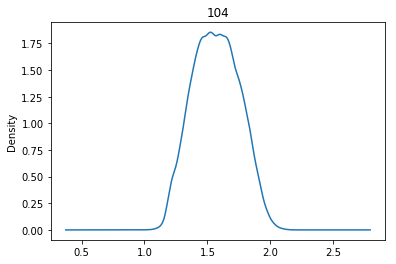

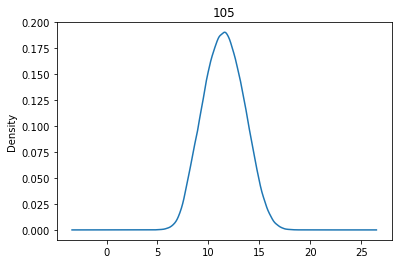

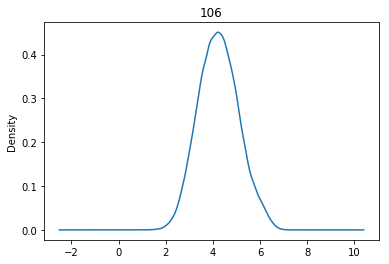

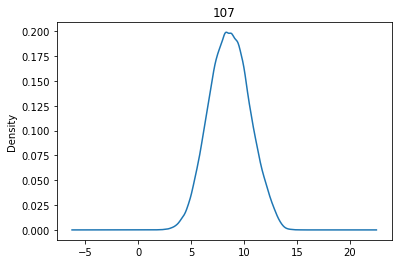

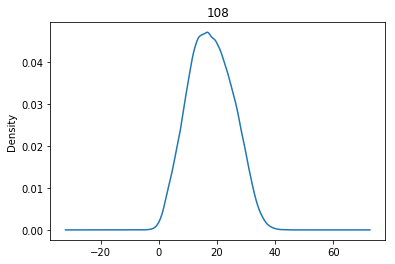

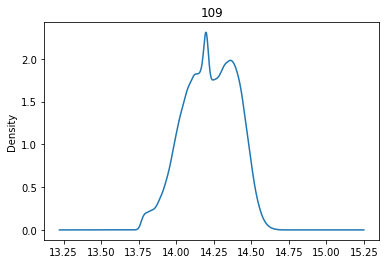

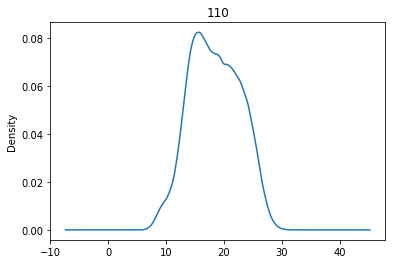

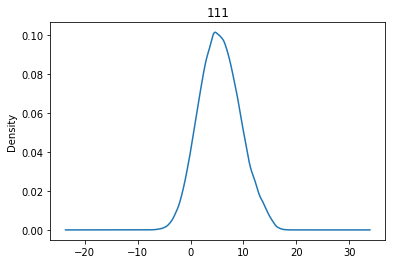

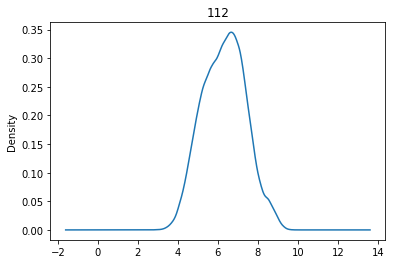

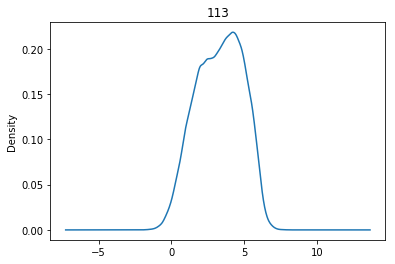

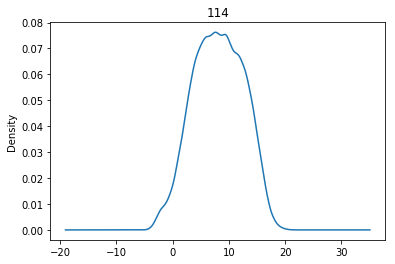

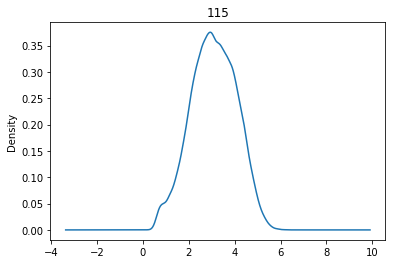

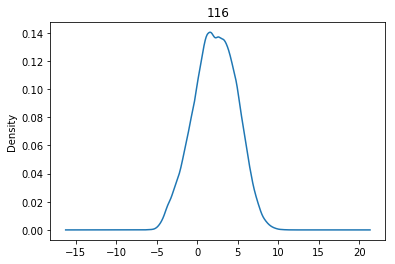

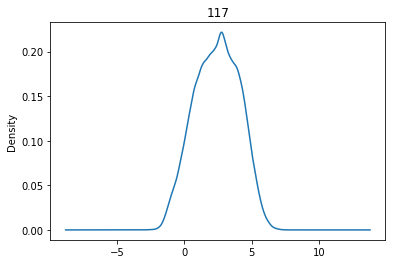

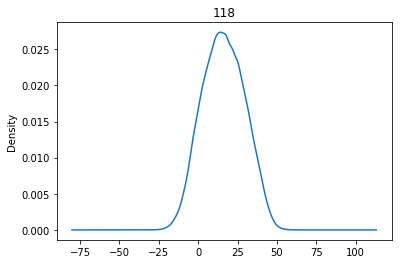

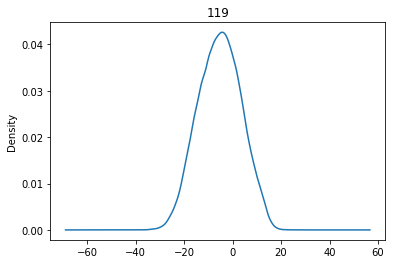

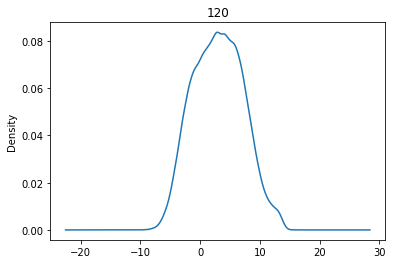

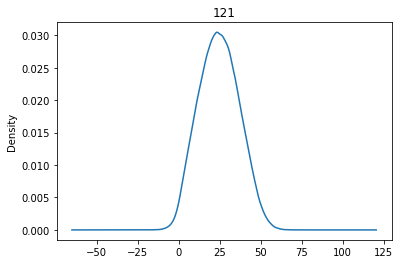

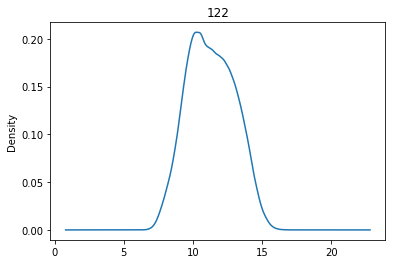

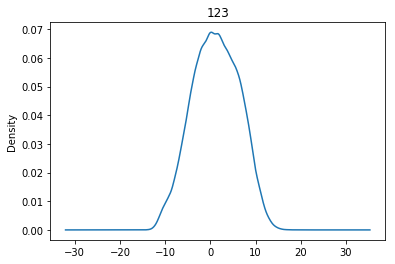

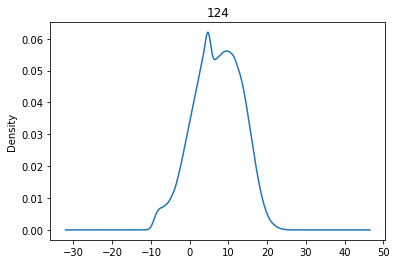

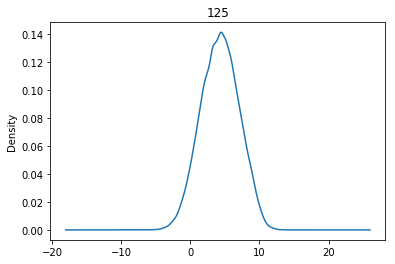

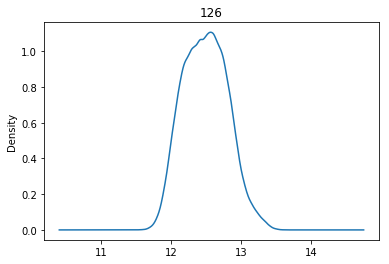

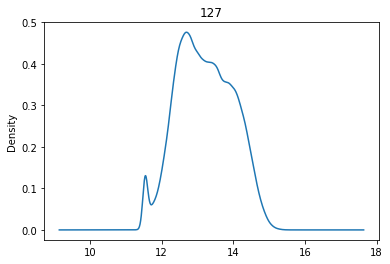

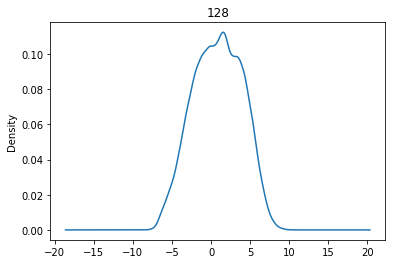

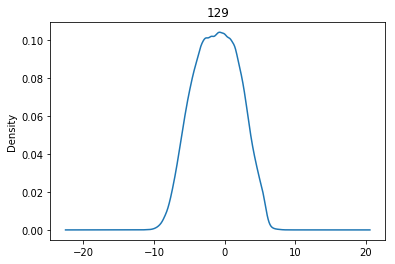

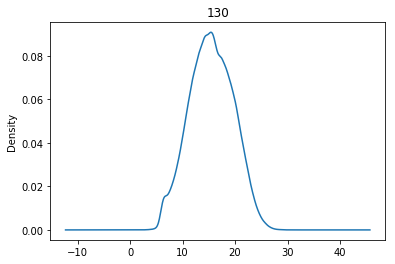

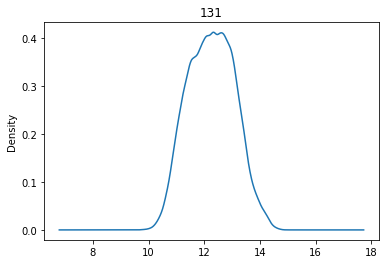

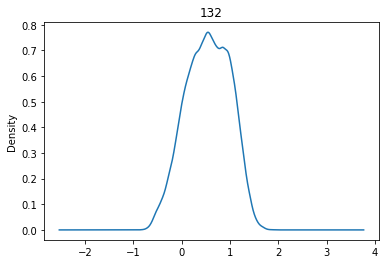

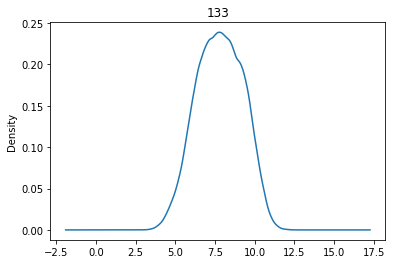

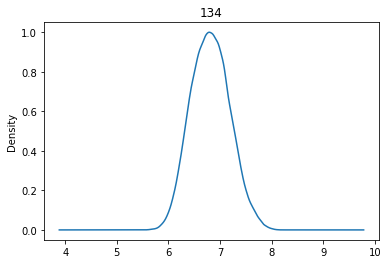

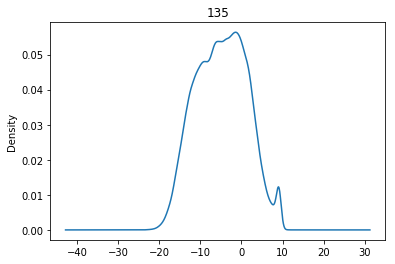

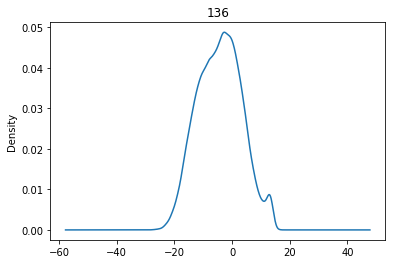

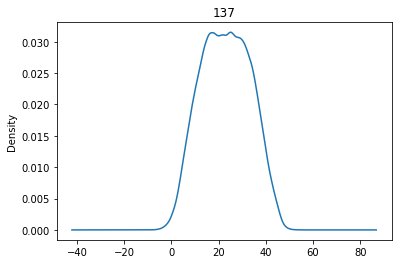

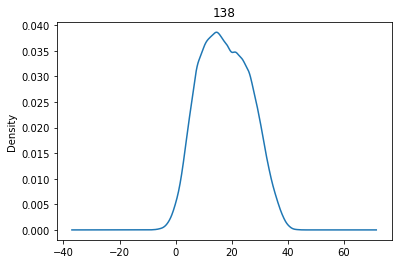

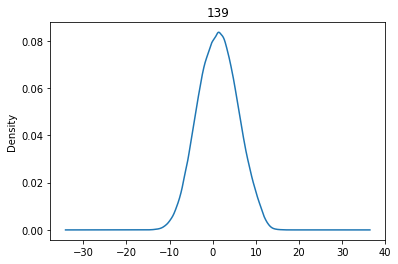

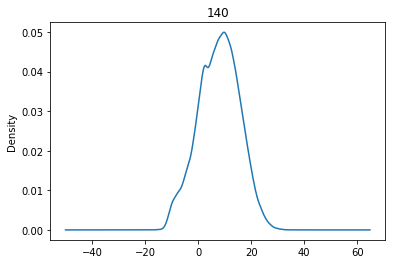

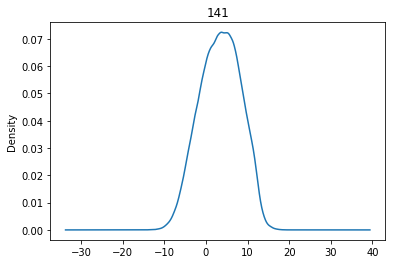

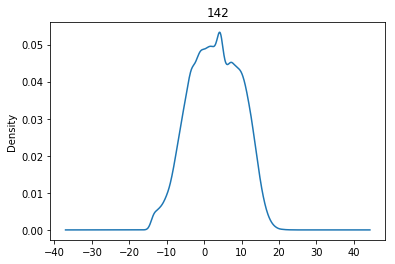

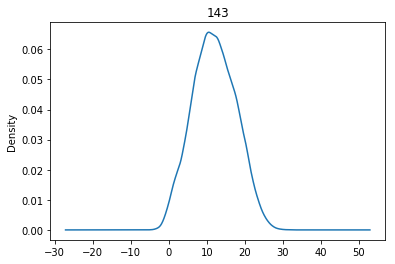

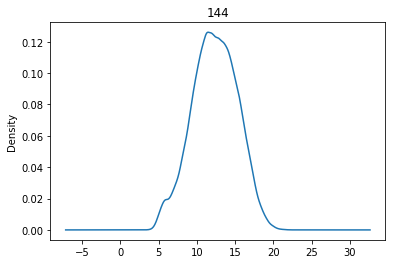

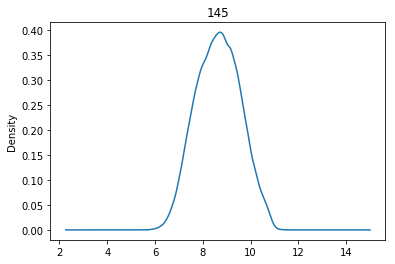

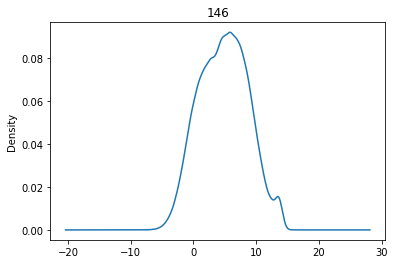

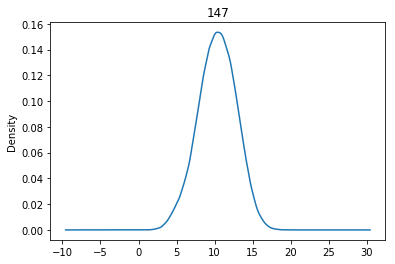

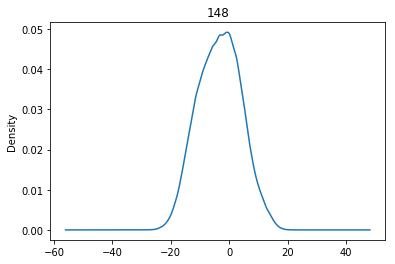

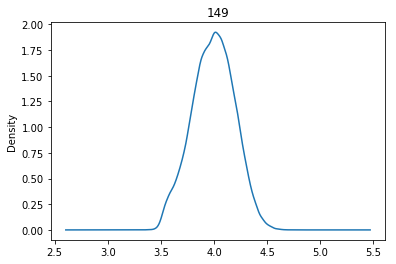

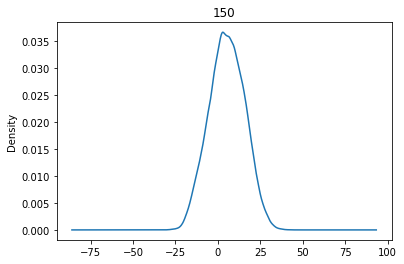

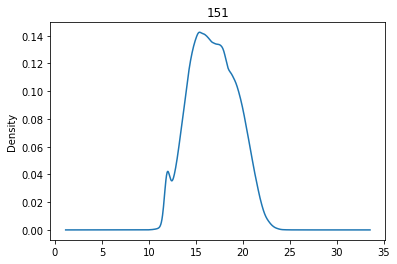

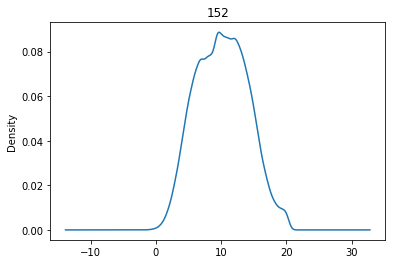

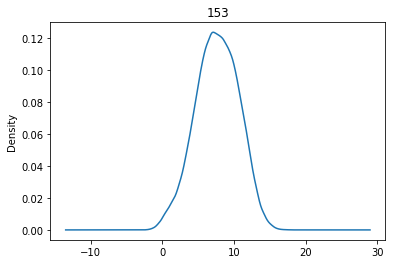

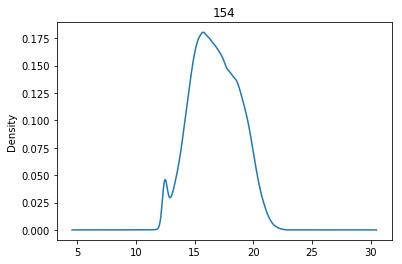

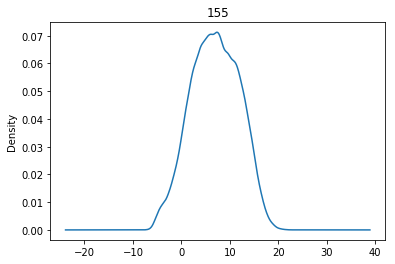

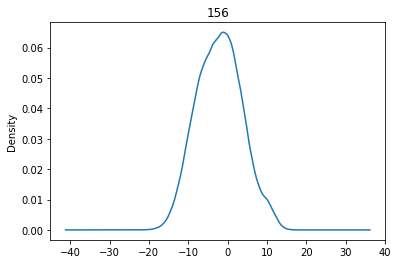

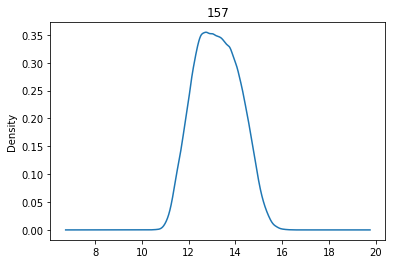

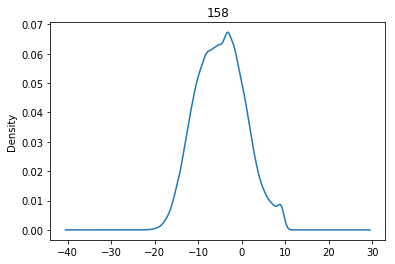

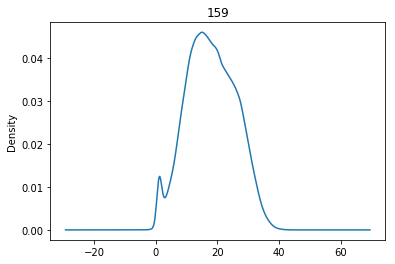

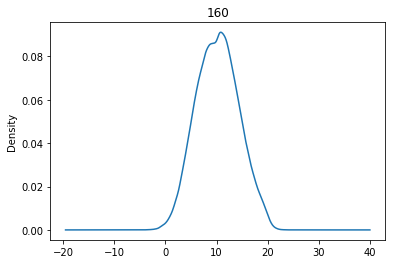

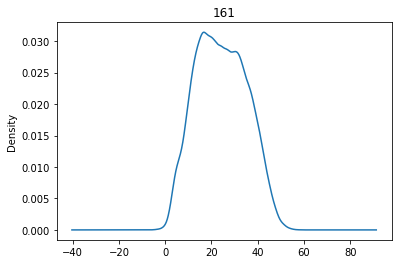

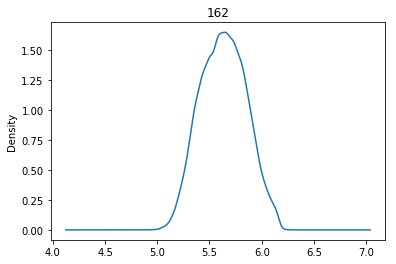

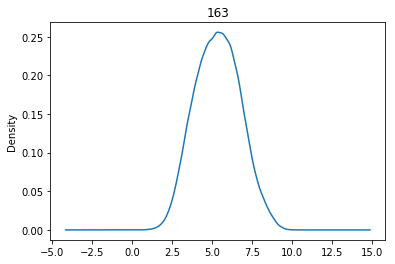

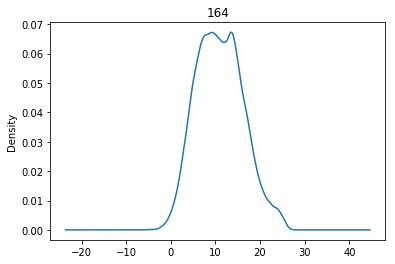

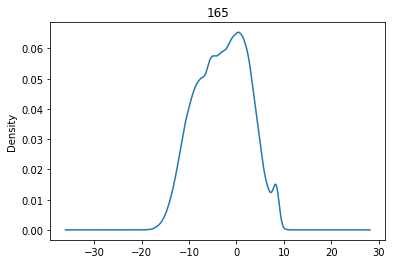

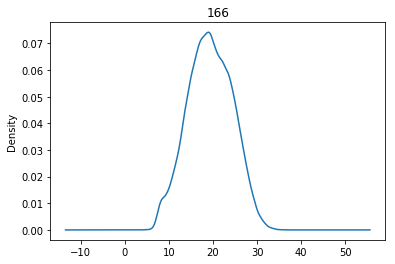

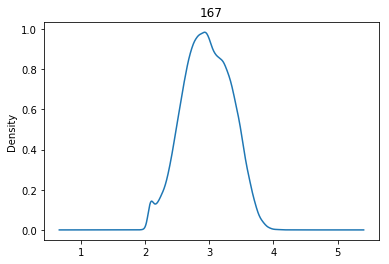

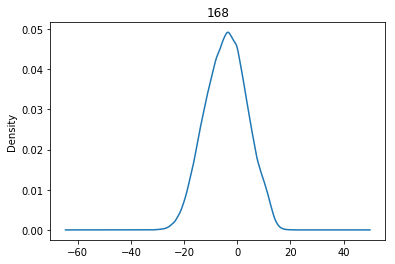

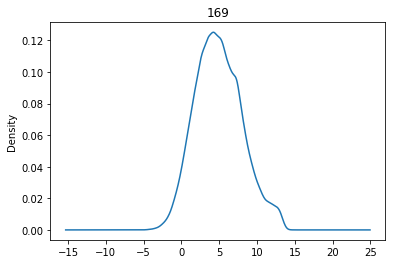

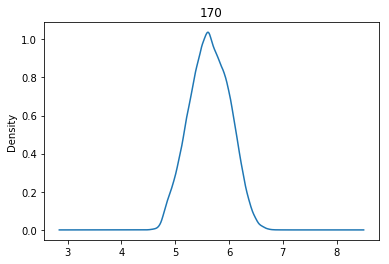

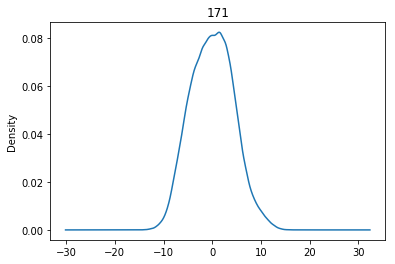

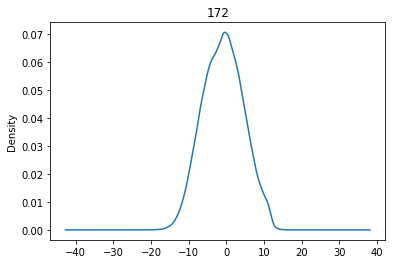

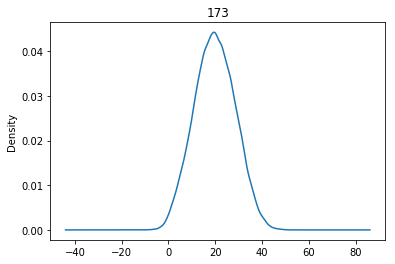

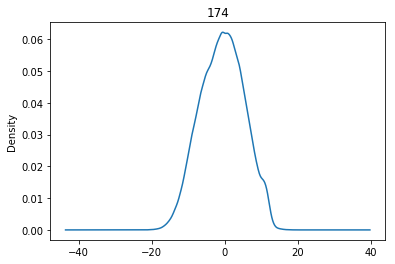

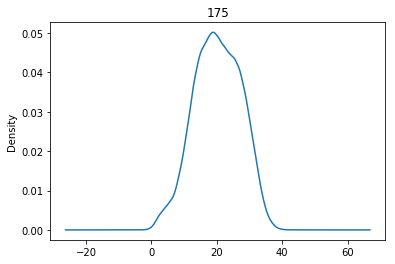

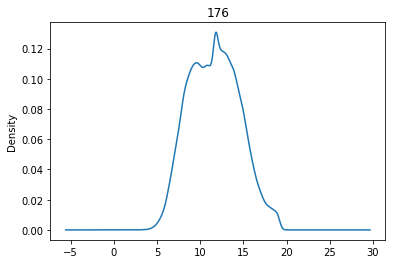

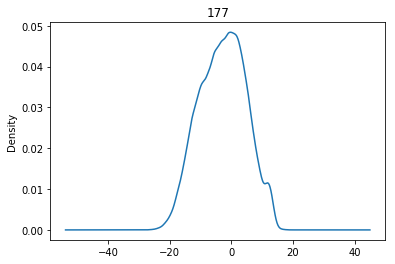

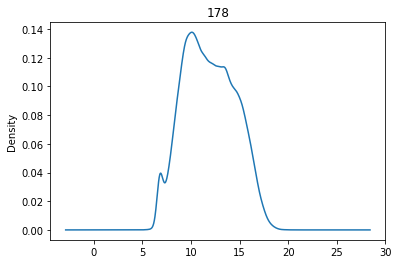

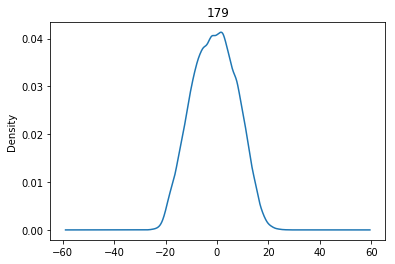

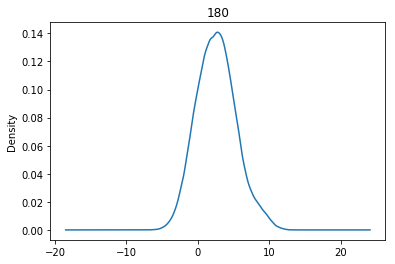

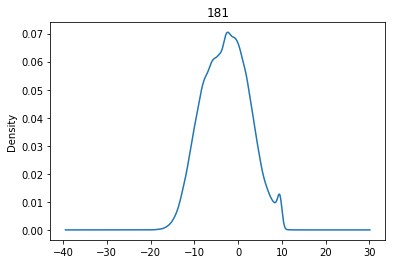

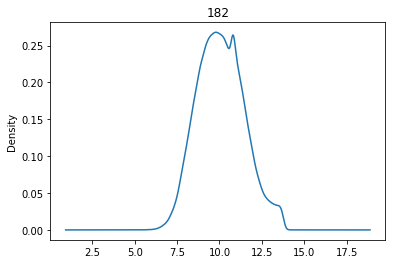

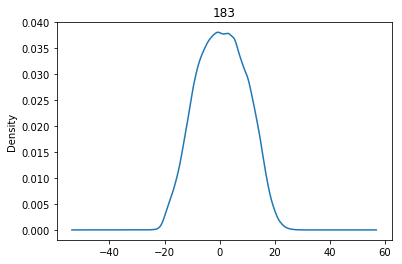

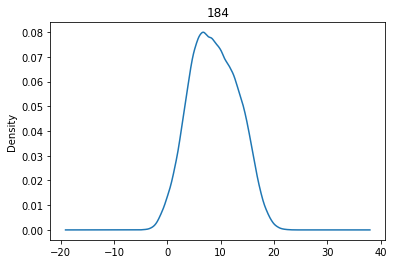

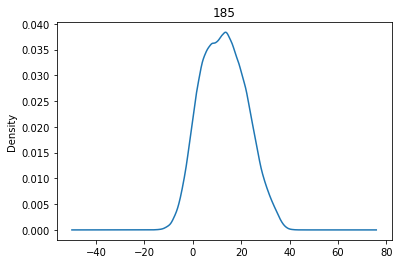

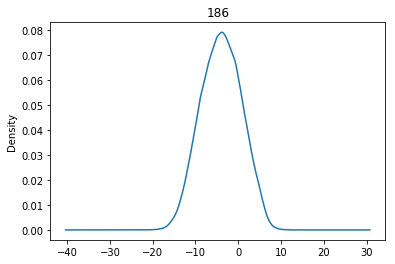

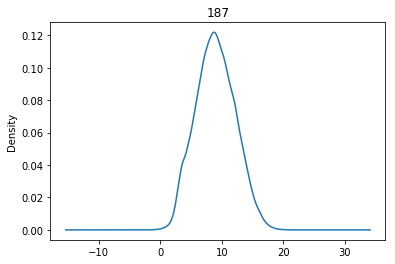

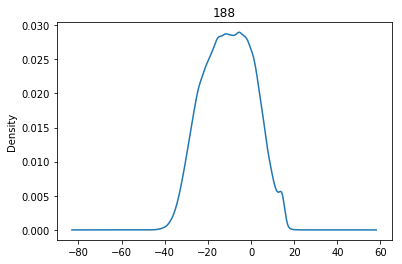

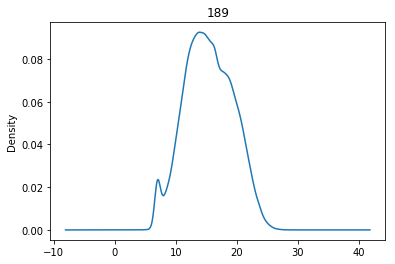

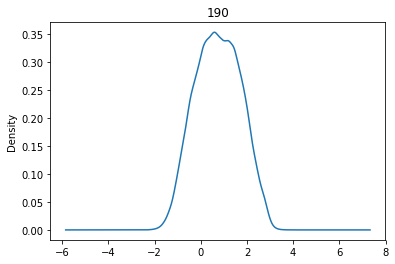

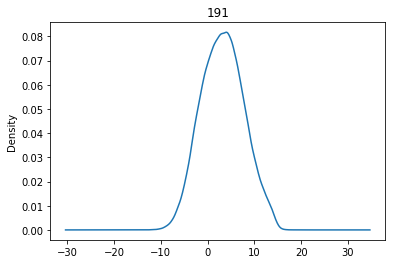

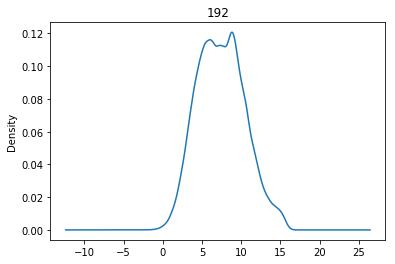

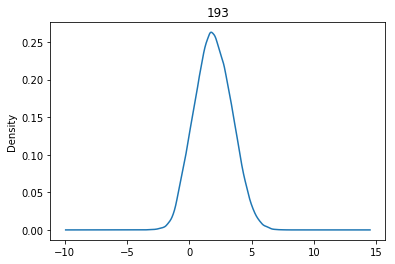

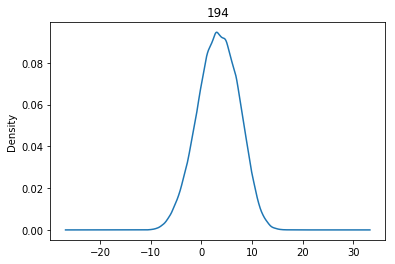

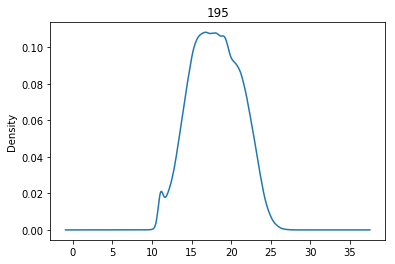

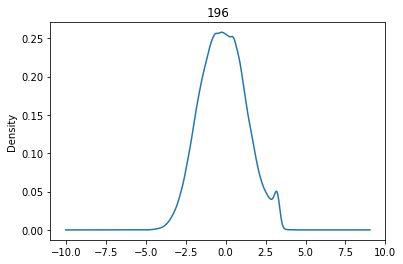

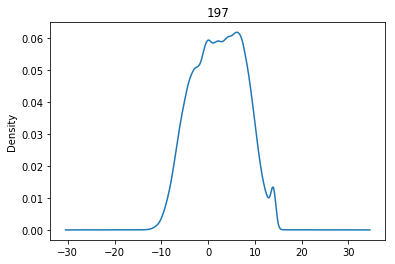

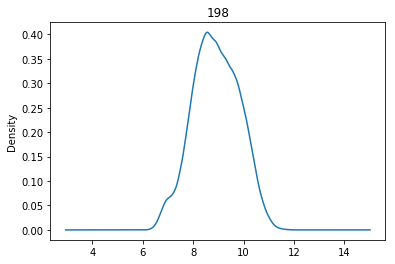

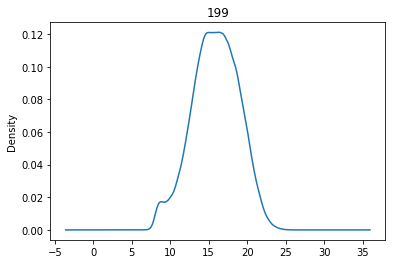

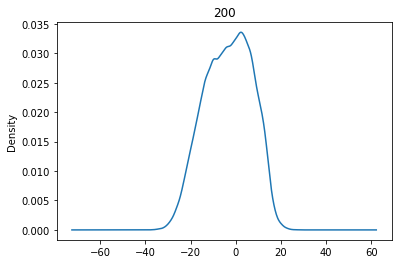

In [13]:
#Density Plots

for column in range(0,len(training_data_df.columns)):
    training_data_df.iloc[:,column].plot(kind='density')
    pyplot.title(column)
    pyplot.show()

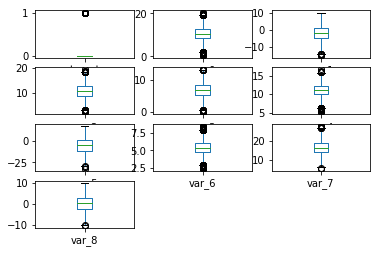

In [14]:
#Box Plots (first 10 featurs only)

training_data_df.iloc[:,0:10].plot(kind='box',subplots=True, layout= (4,3), sharex=False,sharey=False)
pyplot.show()

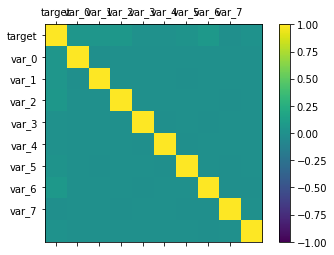

In [15]:
#Correllation Matrix (First 10 Features Only)

#Correlation Matrix Plot - Sample
#plot correlation matxrix
correlations = training_data_df.iloc[:,0:10].corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(training_data_df.columns[0:10]))
ax.set_yticklabels(list(training_data_df.columns[0:10]))
pyplot.show()

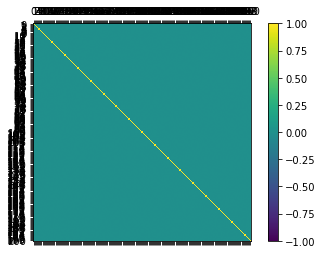

In [16]:
#Correlation Matrix Plot - Entire Set
#Plot correlation matrix
correlations = training_data_df.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(training_data_df.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(list(training_data_df.columns))
#ax.set_yticklabels(list(training_data_df.columns))
pyplot.show()

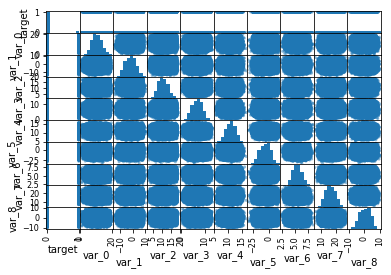

In [17]:
#Scatter Matix (First 10 Features Only)

scatter_matrix(training_data_df.iloc[:,0:10])
pyplot.show()

In [18]:
#Standardize Data

from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
array=training_data_df.values
#Separate into input and output components
X = array[:,1:len(training_data_df.columns)]
Y = array[:,0]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
#Summarize transformed data
set_printoptions(precision = 5)
print(rescaledX[0:5,0:10])


[[-0.5771  -1.27374  0.45171 -0.83371  0.23557 -0.53643 -0.33493  0.60875
  -1.56158 -1.4738 ]
 [ 0.26996 -0.62214  1.19036 -0.68885  0.79097  1.5399   0.24446 -0.00353
   0.85897  0.4193 ]
 [-0.68111 -0.27607  0.51699  0.53652 -0.30548 -0.51103  1.76984 -0.56475
  -1.56137 -1.30741]
 [ 0.12516 -0.12943 -0.66758  0.19535  0.92799  0.41067  0.50063 -0.4742
  -1.84391  0.54877]
 [-0.2773   0.03561  0.81768 -0.07783  0.73861  0.95557  0.61337  0.79154
   1.79475  0.09001]]


# Validation Data Set

In [19]:
#Create Training and Validation Sets
from sklearn.model_selection import train_test_split

array = training_data_df.values
X = array[:,1:202]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed, stratify=Y)

In [20]:
print("X_train Shape: ", X_train.shape)

X_train Shape:  (160000, 200)


In [21]:
print("Y_train Shape: ", Y_train.shape)

Y_train Shape:  (160000,)


In [22]:
print("X_validation Shape: ", X_validation.shape)

X_validation Shape:  (40000, 200)


In [23]:
print("Y_validation Shape", Y_validation.shape)

Y_validation Shape (40000,)


# Model Training and Selection

In [27]:
#Evaluate Using K-Fold Cross Validation and Logistic Regression

#from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
num_folds = 10
seed =7
scoring= 'roc_auc'
#kfold = KFold(n_splits=num_folds,random_state=seed)
kfold = StratifiedKFold(n_splits=num_folds,random_state=seed)
model = LogisticRegression(solver='lbfgs',max_iter=4000,verbose=0)
results = cross_val_score(model, X_train, Y_train, cv=kfold,scoring=scoring)
print("AUC: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

AUC: 85.944% (0.623%)


In [28]:
#Evaluate Using K-Fold Cross Validation and LDA
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
num_folds = 10
seed =7
scoring= 'roc_auc'
#kfold = KFold(n_splits=num_folds,random_state=seed)
kfold = StratifiedKFold(n_splits=num_folds,random_state=seed)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X_train, Y_train, cv=kfold,scoring=scoring)
print("AUC: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


AUC: 85.979% (0.616%)


Running model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Results:[0.85753 0.85418 0.86589 0.8552  0.85792 0.86639 0.85389 0.87216 0.85208
 0.85916]
Running model LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Results:[0.85813 0.85353 0.86625 0.85609 0.85859 0.8666  0.85394 0.87212 0.8529
 0.85975]
Running model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Results:[0.5403  0.53342 0.54356 0.53923 0.53636 0.53754 0.53174 0.53933 0.55108
 0.52779]
Running model DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=No

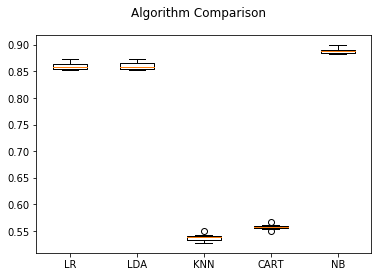

In [29]:
#Baseline Comparison - Compare Performance of a Range of Models on Training Data

#Models:

#Logistic Regression
#Linear Discriminant Analysis
#K Nearest Neighbors
#Basic Tree
#Naive Bayes
#Support Vector Machine - not run takes to long

#As this is a classification model - utilize AUC/ROC as performance metric

#from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

seed = 7

#prepare Models

models = []
models.append(('LR',LogisticRegression(solver='lbfgs',max_iter=5000,random_state=seed,verbose=0)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier(random_state=seed)))
models.append(('NB',GaussianNB()))
#models.append(('SVM',SVC(random_state=seed,verbose=0)))

#evaluate each model in turn

results=[]
names=[]
scoring='roc_auc'
for name, model in models:
    print ('Running model {model}'.format(model=model))
    #kfold=KFold(n_splits=10, random_state=seed)
    kfold = StratifiedKFold(n_splits=num_folds,random_state=seed)
    cv_results= cross_val_score(model,X_train,Y_train,cv=kfold, scoring=scoring,verbose=0)
    print ('Results:{results}'.format(results=cv_results))
    results.append(cv_results)
    names.append(name)
    msg = "%s %f (%r)" % (name, cv_results.mean(),cv_results.std())
    mail_send(name,cv_results,msg)
    
#boxplot comparison of all CV folds for each model

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Running model Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])
Results:0.859630319703391
Running model Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))])
Results:0.8596829943513343
Running model Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='unifo

C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

Results:0.7018452577872571
Running model Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ET', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=7, verbose=0, warm_start=False))])


C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

Results:0.6360318031938735


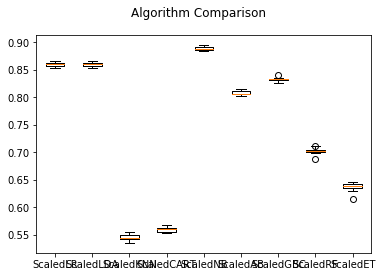

In [30]:
#Compare Performance of above models, several ensemble models, with scaled data:

#AdaBoost
#Gradient Boosted Trees
#Random Forest
#Extra Trees

from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

seed = 7 

#prepare Models

pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression(solver='lbfgs',
                                                                max_iter=5000,random_state=seed))])))
pipelines.append(('ScaledLDA',Pipeline([('Scaler',StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier(random_state=seed))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))
#pipelines.append(('ScaledSVM',Pipeline([('Scaler',StandardScaler()),('SVC',SVC(random_state=seed,verbose=0))])))
pipelines.append(('ScaledAB', Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostClassifier(random_state=seed))])))
pipelines.append(('ScaledGBC', Pipeline([('Scaler',StandardScaler()),('GBC',GradientBoostingClassifier(random_state=seed))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler',StandardScaler()),('RF',RandomForestClassifier(random_state=seed))])))
pipelines.append(('ScaledET', Pipeline([('Scaler',StandardScaler()),('ET',ExtraTreesClassifier(random_state=seed))])))

#evaluate each model in turn

results=[]
names=[]
scoring='roc_auc'
for name, model in pipelines:
    print ('Running model {model}'.format(model=model))
    #kfold=KFold(n_splits=10, random_state=7)
    kfold = StratifiedKFold(n_splits=num_folds,random_state=seed)
    cv_results= cross_val_score(model,X,Y,cv=kfold, scoring=scoring)
    print ('Results:{results}'.format(results=cv_results.mean()))
    results.append(cv_results)
    names.append(name)
    msg = "%s %f (%r)" % (name, cv_results.mean(),cv_results.std())
    mail_send(name,cv_results,msg)
    
#boxplot comparison

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [54]:
#Tune LR by Running a Grid Search

from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
array = training_data_df.values

# Scale Data

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

#kfold=KFold(n_splits=10,random_state=7)
kfold=StratifiedKFold(n_splits=10,random_state=7)
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
grid_param = dict(C =c_values)
model = LogisticRegression(solver='lbfgs',random_state=7,verbose=0)
grid = GridSearchCV(estimator=model, param_grid=grid_param,cv=kfold,scoring='roc_auc')
grid.fit(rescaledX,Y_train)
print(grid.best_score_)
print(grid.best_estimator_.C)


0.8597914743256011
0.001


In [32]:
#Tune LDA by Running a Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
array = training_data_df.values

# Scale Data

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

#kfold=KFold(n_splits=10,random_state=7)
kfold=StratifiedKFold(n_splits=10,random_state=7)
search_params = {'n_components': [10, 20, 30], 'shrinkage': [.3,.5, .7, .9]}
model = LinearDiscriminantAnalysis(solver = 'lsqr')
grid = GridSearchCV(estimator=model, param_grid=search_params,cv=kfold,scoring='roc_auc')
grid.fit(rescaledX,Y_train)
print(grid.best_score_)
print(grid.best_params_)



0.859957719180662
{'n_components': 10, 'shrinkage': 0.9}


In [56]:
#Tune GBC Running a Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
array = training_data_df.values

# Scale Data

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

#learning_rates = [1, 0.1, 0.01]
learning_rates = [1, 0.1, 0.01]
#n_estimators = [1, 100, 200]
#n_estimators = [1, 100, 200]
#max_depths = [10,20,30]
#search_params = {'learning_rate': learning_rates, 'n_estimators':n_estimators,'max_depth':max_depths}
search_params = {'learning_rate': learning_rates}

#kfold=KFold(n_splits=10,random_state=7)
kfold=StratifiedKFold(n_splits=10,random_state=7)
model = GradientBoostingClassifier(random_state=7,verbose=0)
grid = GridSearchCV(estimator=model, param_grid=search_params,cv=kfold)
grid.fit(rescaledX,Y_train)
print(grid.best_score_)
print(grid.best_params_)


0.90548125
{'learning_rate': 1}


# Finalize Models

In [52]:
# Finalize LR

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression(solver='lbfgs',C=.001,random_state=7,verbose=0)
model.fit(rescaledX, Y_train)

#Estimate Accuracy, generate Confusion Matrix on Validation Set

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))



0.91305
[[35607   373]
 [ 3105   915]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     35980
         1.0       0.71      0.23      0.34      4020

   micro avg       0.91      0.91      0.91     40000
   macro avg       0.82      0.61      0.65     40000
weighted avg       0.90      0.91      0.89     40000



In [53]:
# Finalize LDA

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LinearDiscriminantAnalysis(n_components = 10, shrinkage= 0.9,solver = 'lsqr')
model.fit(rescaledX, Y_train)

#Estimate Accuracy, generate Confusion Matrix on Validation Set

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.913275
[[35455   525]
 [ 2944  1076]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     35980
         1.0       0.67      0.27      0.38      4020

   micro avg       0.91      0.91      0.91     40000
   macro avg       0.80      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



In [57]:
# Finalize GBC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(learning_rate=1, random_state=7,verbose=0)
model.fit(rescaledX, Y_train)

#Estimate Accuracy, generate Confusion Matrix on Validation Set

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9042
[[34700  1280]
 [ 2552  1468]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     35980
         1.0       0.53      0.37      0.43      4020

   micro avg       0.90      0.90      0.90     40000
   macro avg       0.73      0.66      0.69     40000
weighted avg       0.89      0.90      0.90     40000



In [50]:
# Finalize NB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GaussianNB()
model.fit(rescaledX, Y_train)

#Estimate Accuracy, generate Confusion Matrix on Validation Set

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.92135
[[35391   589]
 [ 2557  1463]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     35980
         1.0       0.71      0.36      0.48      4020

   micro avg       0.92      0.92      0.92     40000
   macro avg       0.82      0.67      0.72     40000
weighted avg       0.91      0.92      0.91     40000

